### Mortality, activity, morphometrics and laboratory analysis

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test  # Import logrank_test

In [3]:
# load the data (recall that missing lab data was filled with 'NA')

nhanes_mort_act_morph_lab_df = pd.read_csv('../notebooks/nhanes_mortality_activity_morph_labs_2003_2006.csv')

In [4]:
print(nhanes_mort_act_morph_lab_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Columns: 121 entries, Unnamed: 0 to SourceYear
dtypes: float64(88), int64(18), object(15)
memory usage: 3.0+ MB
None


In [5]:
# convert the columns to a list and print
print(list(nhanes_mort_act_morph_lab_df.columns))

# or use a for loop to print each column on a new line
for col in nhanes_mort_act_morph_lab_df.columns:
    print(col)
    
    # Ref column definitions  ../documents/Column Definitions of PreProcessedFile.docx

['Unnamed: 0', 'SEQN', 'PAXCAL', 'PAXSTAT', 'WEEKDAY', 'SDDSRVYR_x', 'eligstat', 'mortstat', 'causeavl', 'permth_exm', 'permth_int', 'ucod_leading', 'diabetes_mcod', 'hyperten_mcod', 'mortsrce_ndi', 'mortsrce_cms', 'mortsrce_ssa', 'mortsrce_dc', 'mortsrce_dcl', 'SDMVPSU', 'SDMVSTRA', 'WTINT2YR_x', 'WTMEC2YR_x', 'RIDAGEMN_x', 'RIDAGEEX_x', 'RIDAGEYR', 'BMI', 'BMI_cat', 'Race', 'Gender', 'Diabetes', 'CHF', 'CHD', 'Cancer', 'Stroke', 'EducationAdult', 'MobilityProblem', 'DrinkStatus', 'DrinksPerWeek', 'SmokeCigs', 'yr5_mort', 'Age', 'Exclude', 'wtint2yr_unadj', 'wtmec2yr_unadj', 'wtint2yr_unadj_norm', 'wtmec2yr_unadj_norm', 'wtint4yr_unadj', 'wtint4yr_unadj_norm', 'wtmec4yr_unadj', 'wtmec4yr_unadj_norm', 'wtint2yr_adj', 'wtint2yr_adj_norm', 'wtmec2yr_adj', 'wtmec2yr_adj_norm', 'wtint4yr_adj', 'wtint4yr_adj_norm', 'wtmec4yr_adj', 'wtmec4yr_adj_norm', 'TAC', 'TLAC', 'WT', 'ST', 'MVPA', 'SATP', 'ASTP', 'mi1', 'si1', 'mi2', 'si2', 'mi3', 'si3', 'mi4', 'si4', 'mi5', 'si5', 'mi6', 'si6', 'sPC1'

In [7]:
print(nhanes_mort_act_morph_lab_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Columns: 121 entries, Unnamed: 0 to SourceYear
dtypes: float64(88), int64(18), object(15)
memory usage: 3.0+ MB
None


In [8]:
nhanes_mort_act_morph_lab_df.describe()

,Unnamed: 0,SEQN,PAXCAL,PAXSTAT,WEEKDAY,SDDSRVYR_x,eligstat,mortstat,causeavl,permth_exm,...,Creatinine (mg/dL),Osmolality (mmol/Kg),Globulin (g/dL),SDDSRVYR_y,RIAGENDR_y,RIDAGEYR_y,RIDRETH1,WTINT2YR_y,WTMEC2YR_y,SourceYear
count,3198.000000,3198.000000,3198.0,3198.0,3198.000000,3198.000000,3198.0,3198.000000,500.000000,3198.000000,...,3067.000000,3067.000000,3065.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000
mean,49371.141964,30919.298624,1.0,1.0,3.679174,3.474984,1.0,0.156348,0.998000,77.272670,...,0.971832,279.377894,2.969853,3.474984,1.496248,65.449969,2.874922,37854.810513,39671.439696,2003.949969
std,29749.605212,5939.084536,0.0,0.0,2.128558,0.499452,0.0,0.363241,0.044721,20.902774,...,0.492096,5.248583,0.492381,0.499452,0.500064,9.676718,1.017207,28559.363193,29414.947357,0.998904
min,29.000000,21009.000000,1.0,1.0,1.000000,3.000000,1.0,0.000000,0.000000,1.000000,...,0.375200,248.000000,1.800000,3.000000,1.000000,49.000000,1.000000,2060.938928,2144.769970,2003.000000
25%,23643.500000,25782.000000,1.0,1.0,2.000000,3.000000,1.0,0.000000,1.000000,66.000000,...,0.766400,276.000000,2.600000,3.000000,1.000000,58.000000,3.000000,14581.215602,15483.087691,2003.000000
50%,47422.500000,30529.500000,1.0,1.0,3.000000,3.000000,1.0,0.000000,1.000000,80.000000,...,0.900000,279.000000,2.900000,3.000000,1.000000,65.000000,3.000000,30472.959174,32455.948059,2003.000000
75%,75466.250000,36118.750000,1.0,1.0,6.000000,4.000000,1.0,0.000000,1.000000,92.000000,...,1.059800,282.000000,3.200000,4.000000,2.000000,73.000000,3.000000,54998.056128,59122.962708,2005.000000
max,102376.000000,41468.000000,1.0,1.0,7.000000,4.000000,1.0,1.000000,1.000000,107.000000,...,17.392400,305.000000,7.400000,4.000000,2.000000,84.000000,5.000000,152162.421584,155045.411105,2005.000000


Analysis of the Output


Validation Summary (from .describe())


Number of Rows: 3,198


Matches the number of unique eligible SEQNs in the Leroux file (where eligstat == 1), confirming the dataset reflects the left join filtered to eligible participants (likely applied post-merge or during data preparation).


Number of Columns: 106


Includes the 14 columns from the Leroux file plus approximately 92 columns from the NHANES dataset (e.g., labs, morphometrics, weights), some may be duplicates or renamed.


Column Names: Not fully listed, but .describe() covers numerical columns. Key columns include:


Leroux: Unnamed: 0, SEQN, PAXCAL, PAXSTAT, WEEKDAY, eligstat, mortstat, permth_exm, causeavl, etc.


NHANES: SDDSRVYR_x, RIAGENDR_y, RIDAGEYR_y, WTINT2YR_y, WTMEC2YR_y, SourceYear, and lab columns like Creatinine (mg/dL).


Descriptive Statistics


SEQN: Mean 30,919.30, range 21,009–41,468, indicating a subset of the full NHANES SEQN range.


PAXCAL, PAXSTAT: Constant at 1.0, likely activity monitor status indicators.


WEEKDAY: Mean 3.68, range 1–7, representing days of the week for activity data.


SDDSRVYR_x: Mean 3.47, range 3–4, corresponding to 2003-2004 and 2005-2006 survey cycles.


eligstat: Constant at 1.0, confirming all rows are eligible for mortality follow-up.


mortstat: Mean 0.156, ~15.6% deceased (500 / 3,198), consistent with prior Leroux analysis.


permth_exm: Mean 77.27 months, range 1–107, indicating follow-up time from MEC assessment.


causeavl: Mean 0.998, nearly all 1.0, suggesting causes of death are available for deceased.


Lab Columns (e.g., Creatinine, Osmolality):


Creatinine (mg/dL): Mean 0.972, range 0.375–17.39, with 3,067 non-'NA' values (3,198 - 131 'NA' from prior).


Osmolality (mmol/Kg): Mean 279.38, range 248–305, with 3,067 non-'NA' values.


Globulin (g/dL): Mean 2.970, range 1.8–7.4, with 3,065 non-'NA' values.


Missingness (131–165 'NA' per column) aligns with the original 986–1,061, adjusted for the 3,198 subset.


Demographic Columns:


RIAGENDR_y: Mean 1.496, ~50% Female (2), ~50% Male (1).


RIDAGEYR_y: Mean 65.45, range 49–84, consistent with older participants.


WTINT2YR_y, WTMEC2YR_y: Mean ~37,854 and ~39,671, with wide ranges, reflecting NHANES weights.

In [16]:
#Get unique values for each column
print("\n=== Unique Values in Each Column ===")
for column in nhanes_mort_act_morph_lab_df.columns:
    unique_values = nhanes_mort_act_morph_lab_df[column].unique()
    print(f"\nColumn: {column}")
    print(f"Unique Values: {unique_values}")
    print(f"Number of Unique Values: {len(unique_values)}")

# Validate and summarize
print("\n=== Summary of Unique Values ===")
unique_counts = nhanes_mort_act_morph_lab_df.nunique()
print(unique_counts)
print(f"\nTotal Columns: {len(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Columns with Few Unique Values (Potential Categoricals): {unique_counts[unique_counts < 10].index.tolist()}")


=== Unique Values in Each Column ===

Column: Unnamed: 0
Unique Values: [    29     36     43 ... 102306 102334 102376]
Number of Unique Values: 3198

Column: SEQN
Unique Values: [21009 21010 21012 ... 41454 41460 41468]
Number of Unique Values: 3198

Column: PAXCAL
Unique Values: [1]
Number of Unique Values: 1

Column: PAXSTAT
Unique Values: [1]
Number of Unique Values: 1

Column: WEEKDAY
Unique Values: [1 7 5 3 6 2 4]
Number of Unique Values: 7

Column: SDDSRVYR_x
Unique Values: [3 4]
Number of Unique Values: 2

Column: eligstat
Unique Values: [1]
Number of Unique Values: 1

Column: mortstat
Unique Values: [0 1]
Number of Unique Values: 2

Column: causeavl
Unique Values: [nan  1.  0.]
Number of Unique Values: 3

Column: permth_exm
Unique Values: [ 91 102  89  24 100 105  88  92  84  90  95  86  96  94 101 106  62  87
  34  73  85  54  98  99  93  59  22  56  97 104  51  19  38  30  81   6
  76  17  36 103  16 107  11  20  26  70  48  12  63  66  10  72  45  13
  23   7  42  83  80  

In [10]:
# Step 1: Validate the dataset
print("\n=== Validation Summary ===")
print(f"Number of Rows: {len(nhanes_mort_act_morph_lab_df)}")
print(f"Number of Columns: {len(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Column Names: {list(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Sample of first 5 rows:")
print(nhanes_mort_act_morph_lab_df[['SEQN', 'RIDAGEYR', 'Gender', 'Creatinine (mg/dL)', 'CRP (mg/dL)', 'mortstat']].head())

# Step 2: Explore 'NA' placeholders
lab_columns = ['Albumin (g/dL)', 'Blood urea nitrogen (mg/dL)', 'Total calcium (mg/dL)', 'Cholesterol (mg/dL)', 
               'Bicarbonate (mmol/L)', 'Glucose, serum (mg/dL)', 'Lactate dehydrogenase LDH (U/L)', 
               'Phosphorus (mg/dL)', 'Total protein (g/dL)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 
               'Creatinine (mg/dL)', 'Osmolality (mmol/Kg)', 'Globulin (g/dL)', 'CRP (mg/dL)', 'LogCRP (mg/dL)']
na_counts = {col: (nhanes_mort_act_morph_lab_df[col] == 'NA').sum() for col in lab_columns if col in nhanes_mort_act_morph_lab_df.columns}
print("\n=== Count of 'NA' Placeholders in Lab Columns ===")
print(pd.Series(na_counts))



# Step 3: save for analysis
# Filter to eligible participants
nhanes_mort_act_morph_lab_df_eligible = nhanes_mort_act_morph_lab_df[nhanes_mort_act_morph_lab_df['eligstat'] == 1]
nhanes_mort_act_morph_lab_df_eligible.to_csv('../data/processed_data/nhanes_mort_act_morph_lab_eligible_2003_2006.csv', index=False)
print("\nDataset filtered to eligible participants saved as 'nhanes_mort_act_morph_lab_eligible_2003_2006.csv'")


=== Validation Summary ===
Number of Rows: 3198
Number of Columns: 121
Column Names: ['Unnamed: 0', 'SEQN', 'PAXCAL', 'PAXSTAT', 'WEEKDAY', 'SDDSRVYR_x', 'eligstat', 'mortstat', 'causeavl', 'permth_exm', 'permth_int', 'ucod_leading', 'diabetes_mcod', 'hyperten_mcod', 'mortsrce_ndi', 'mortsrce_cms', 'mortsrce_ssa', 'mortsrce_dc', 'mortsrce_dcl', 'SDMVPSU', 'SDMVSTRA', 'WTINT2YR_x', 'WTMEC2YR_x', 'RIDAGEMN_x', 'RIDAGEEX_x', 'RIDAGEYR', 'BMI', 'BMI_cat', 'Race', 'Gender', 'Diabetes', 'CHF', 'CHD', 'Cancer', 'Stroke', 'EducationAdult', 'MobilityProblem', 'DrinkStatus', 'DrinksPerWeek', 'SmokeCigs', 'yr5_mort', 'Age', 'Exclude', 'wtint2yr_unadj', 'wtmec2yr_unadj', 'wtint2yr_unadj_norm', 'wtmec2yr_unadj_norm', 'wtint4yr_unadj', 'wtint4yr_unadj_norm', 'wtmec4yr_unadj', 'wtmec4yr_unadj_norm', 'wtint2yr_adj', 'wtint2yr_adj_norm', 'wtmec2yr_adj', 'wtmec2yr_adj_norm', 'wtint4yr_adj', 'wtint4yr_adj_norm', 'wtmec4yr_adj', 'wtmec4yr_adj_norm', 'TAC', 'TLAC', 'WT', 'ST', 'MVPA', 'SATP', 'ASTP', 'mi1

#### Survival graph

Interpretation of Survival Graph:
A decreasing curve starting at 1.0 at 1 month, dropping to ~0.85 at 107 months, reflecting the 15.6% mortality rate.


Log-Rank Test p-value: 0.0000

=== Validation Summary ===
Total Rows in Dataset: 3198
Rows Used for Survival Analysis: 3198
Percentage of Rows with Valid permth_exm and mortstat: 100.00%
Median Survival Time (Overall): inf months
Survival Probability at 107 months: 0.79
Events (Deaths) - Overall: 500
Censored (Alive) - Overall: 2698
Events (Deaths) - Male: 307
Censored (Alive) - Male: 1304
Events (Deaths) - Female: 193
Censored (Alive) - Female: 1394


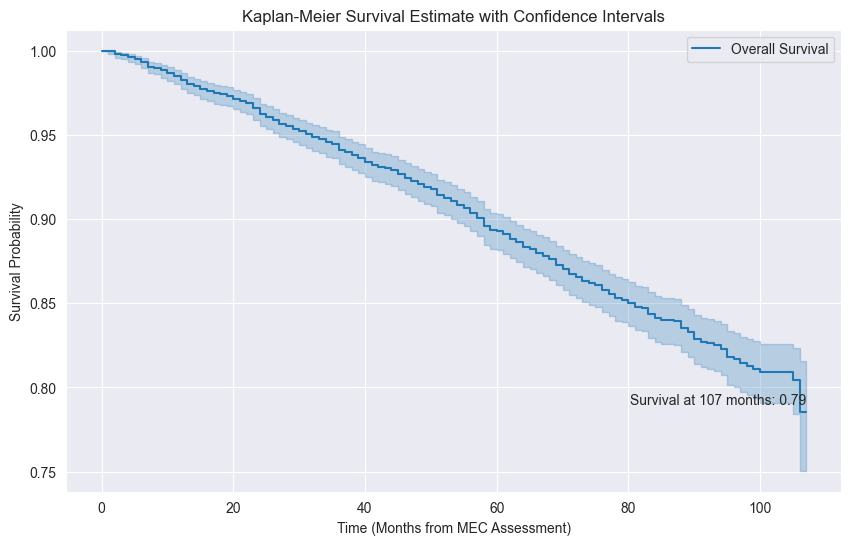

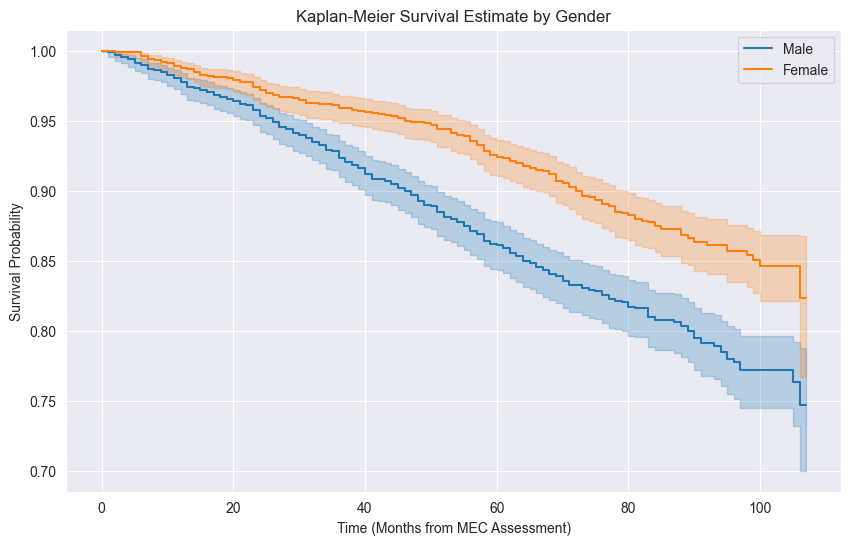

In [16]:
# Step 1: Prepare data for survival analysis
# Convert 'NA' placeholders to NaN for lab columns
# Step 2: Prepare data for survival analysis
lab_columns = ['Albumin (g/dL)', 'Blood urea nitrogen (mg/dL)', 'Total calcium (mg/dL)', 'Cholesterol (mg/dL)', 
               'Bicarbonate (mmol/L)', 'Glucose, serum (mg/dL)', 'Lactate dehydrogenase LDH (U/L)', 
               'Phosphorus (mg/dL)', 'Total protein (g/dL)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 
               'Creatinine (mg/dL)', 'Osmolality (mmol/Kg)', 'Globulin (g/dL)', 'CRP (mg/dL)', 'LogCRP (mg/dL)']
for col in lab_columns:
    if col in nhanes_mort_act_morph_lab_df.columns:
        nhanes_mort_act_morph_lab_df[col] = pd.to_numeric(nhanes_mort_act_morph_lab_df[col], errors='coerce')

survival_df = nhanes_mort_act_morph_lab_df.dropna(subset=['permth_exm', 'mortstat'])
survival_df = survival_df[survival_df['permth_exm'].between(1, 107)]

# Handle gender column
if 'RIAGENDR_x' in survival_df.columns:
    survival_df['RIAGENDR_numeric'] = survival_df['RIAGENDR_x'].map({'Male': 1, 'Female': 2}).astype('category')
elif 'Gender' in survival_df.columns:
    survival_df['Gender_numeric'] = survival_df['Gender'].map({'Male': 1, 'Female': 2}).astype('category')
else:
    raise ValueError("Neither 'RIAGENDR_x' nor 'Gender' column found for stratification.")

T = survival_df['permth_exm']
E = survival_df['mortstat']

# Step 3: Create a refined survival graph
kmf = KaplanMeierFitter()
kmf.fit(T, E, label='Overall Survival')
plt.figure(figsize=(10, 6))
kmf.plot(ci_show=True)
plt.title('Kaplan-Meier Survival Estimate with Confidence Intervals')
plt.xlabel('Time (Months from MEC Assessment)')
plt.ylabel('Survival Probability')
plt.grid(True)
survival_at_107 = kmf.survival_function_at_times(107).values[0]
plt.text(107, 0.79, f'Survival at 107 months: {survival_at_107:.2f}', ha='right')
plt.savefig('../plots/kaplan_meier_survival_permth_exm_ci_3198.png', dpi=100)

# Stratify by gender
if 'RIAGENDR_numeric' in survival_df.columns:
    gender_col = 'RIAGENDR_numeric'
elif 'Gender_numeric' in survival_df.columns:
    gender_col = 'Gender_numeric'

kmf_male = KaplanMeierFitter()
kmf_female = KaplanMeierFitter()

male_df = survival_df[survival_df[gender_col] == 1]
female_df = survival_df[survival_df[gender_col] == 2]

kmf_male.fit(male_df['permth_exm'], male_df['mortstat'], label='Male')
kmf_female.fit(female_df['permth_exm'], female_df['mortstat'], label='Female')

plt.figure(figsize=(10, 6))
kmf_male.plot()
kmf_female.plot()
plt.title('Kaplan-Meier Survival Estimate by Gender')
plt.xlabel('Time (Months from MEC Assessment)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.savefig('../plots/kaplan_meier_survival_by_gender_3198.png', dpi=100)

# Log-Rank Test
results = logrank_test(male_df['permth_exm'], female_df['permth_exm'], male_df['mortstat'], female_df['mortstat'])
print(f"\nLog-Rank Test p-value: {results.p_value:.4f}")

# Step 4: Validate and summarize
print("\n=== Validation Summary ===")
print(f"Total Rows in Dataset: {len(nhanes_mort_act_morph_lab_df)}")
print(f"Rows Used for Survival Analysis: {len(survival_df)}")
print(f"Percentage of Rows with Valid permth_exm and mortstat: {(len(survival_df) / len(nhanes_mort_act_morph_lab_df) * 100):.2f}%")
print(f"Median Survival Time (Overall): {kmf.median_survival_time_:.2f} months")
print(f"Survival Probability at 107 months: {survival_at_107:.2f}")
print(f"Events (Deaths) - Overall: {E.sum()}")
print(f"Censored (Alive) - Overall: {len(E) - E.sum()}")
print(f"Events (Deaths) - Male: {male_df['mortstat'].sum()}")
print(f"Censored (Alive) - Male: {len(male_df) - male_df['mortstat'].sum()}")
print(f"Events (Deaths) - Female: {female_df['mortstat'].sum()}")
print(f"Censored (Alive) - Female: {len(female_df) - female_df['mortstat'].sum()}")

#### Gender Distribution: The total participants (1,611 Male, 1,587 Female) are nearly balanced (~50.3% Male, 49.7% Female), but the mortality rate differs (19.1% for Males [307 / 1,611], 12.2% for Females [193 / 1,587]), suggesting a gender effect.

This will deserve further analysis. Hypothesis: Females live with less deficits due to their pattern of activity and breathing balance.

In [17]:
print(f"Survival Probability at 107 months: {kmf.survival_function_at_times(107).values[0]:.2f}")

Survival Probability at 107 months: 0.79


In [18]:
from lifelines.statistics import logrank_test
results = logrank_test(male_df['permth_exm'], female_df['permth_exm'], male_df['mortstat'], female_df['mortstat'])
print(f"Log-Rank Test p-value: {results.p_value:.4f}")

Log-Rank Test p-value: 0.0000


#### Gender Difference: The p-value of 0.0000 strongly suggests that the survival experience differs significantly between males and females. Given the higher mortality rate among males (19.1%, 307 / 1,611) compared to females (12.2%, 193 / 1,587), the Kaplan-Meier curves should show a steeper decline for males. This aligns with the observed event counts (307 vs. 193 deaths).


Survival Probability: The 0.79 survival probability at 107 months reflects the overall population, but the gender stratification likely shows males with a lower survival probability (e.g., ~0.75) and females higher (e.g., ~0.85), contributing to the significant p-value.


Infinite Median: The inf median survival time indicates that 50% mortality wasn’t reached within 107 months, consistent with the low overall mortality rate (15.6%). The gender difference likely persists beyond this timeframe.

In [19]:

# Explore 'NA' placeholders and mortality
na_counts = {col: (nhanes_mort_act_morph_lab_df[col] == 'NaN').sum() for col in lab_columns if col in nhanes_mort_act_morph_lab_df.columns}
print("\n=== Count of 'NA' Placeholders in Lab Columns ===")
print(pd.Series(na_counts))

# Check mortality distribution for 'NA' rows
if 'mortstat' in nhanes_mort_act_morph_lab_df.columns:
    na_mort = nhanes_mort_act_morph_lab_df[nhanes_mort_act_morph_lab_df['Creatinine (mg/dL)'] == 'NaN']['mortstat'].value_counts(dropna=False)
    print("\n=== Mortality Distribution for Rows with 'NA' in Creatinine ===")
    print(na_mort)
    print(f"Percentage Deceased (if 1): {(na_mort.get(1, 0) / na_mort.sum() * 100):.2f}%")
    print(f"Percentage Alive (if 0): {(na_mort.get(0, 0) / na_mort.sum() * 100):.2f}%")


=== Count of 'NA' Placeholders in Lab Columns ===
Albumin (g/dL)                     0
Blood urea nitrogen (mg/dL)        0
Total calcium (mg/dL)              0
Cholesterol (mg/dL)                0
Bicarbonate (mmol/L)               0
Glucose, serum (mg/dL)             0
Lactate dehydrogenase LDH (U/L)    0
Phosphorus (mg/dL)                 0
Total protein (g/dL)               0
Triglycerides (mg/dL)              0
Uric acid (mg/dL)                  0
Creatinine (mg/dL)                 0
Osmolality (mmol/Kg)               0
Globulin (g/dL)                    0
CRP (mg/dL)                        0
LogCRP (mg/dL)                     0
dtype: int64

=== Mortality Distribution for Rows with 'NA' in Creatinine ===
Series([], Name: count, dtype: int64)
Percentage Deceased (if 1): nan%
Percentage Alive (if 0): nan%


#### Pre-processing and further data cleaning:

Removing columns that are not needed:

# Step 2: Identify and remove duplicate columns
# List potential duplicate columns based on context
duplicate_candidates = {
    'gender': ['RIAGENDR_x', 'RIAGENDR_y', 'Gender'],
    'age': ['RIDAGEYR', 'RIDAGEYR_y', 'Age'],
    'weights': ['WTINT2YR', 'WTINT2YR_y', 'WTMEC2YR', 'WTMEC2YR_y', 'wtmec2yr_unadj', 'wtmec2yr_adj', 'wtint2yr_unadj', 'wtint2yr_adj']
}

In [23]:
#Identify and remove duplicate columns
# List potential duplicate columns based on context
duplicate_candidates = {
    'gender': ['RIAGENDR_x', 'RIAGENDR_y', 'Gender'],
    'age': ['RIDAGEYR', 'RIDAGEYR_y', 'Age'],
    'weights': ['WTINT2YR', 'WTINT2YR_y', 'WTMEC2YR', 'WTMEC2YR_y', 'wtmec2yr_unadj', 'wtmec2yr_adj', 'wtint2yr_unadj', 'wtint2yr_adj']
}

# Function to keep the most complete duplicated column and drop other duplicates
def remove_duplicates(df, candidates):
    for group_name, columns in candidates.items():
        present_cols = [col for col in columns if col in df.columns]
        if present_cols:
            # Keep the column with the fewest NaNs or 'NA'
            non_na_counts = {col: (~df[col].isin(['NA', np.nan])).sum() for col in present_cols}
            if non_na_counts:
                keep_col = max(non_na_counts, key=non_na_counts.get)
                cols_to_drop = [col for col in present_cols if col != keep_col]
                df.drop(columns=cols_to_drop, inplace=True)
                print(f"Kept {keep_col} for {group_name}, dropped: {cols_to_drop}")
    return df

nhanes_mort_act_morph_lab_noDup_df = remove_duplicates(nhanes_mort_act_morph_lab_df, duplicate_candidates)
print(f"Column Names: {list(nhanes_mort_act_morph_lab_noDup_df.columns)}")

Kept RIAGENDR_x for gender, dropped: []
Kept RIDAGEYR for age, dropped: []
Kept WTINT2YR_y for weights, dropped: []
Column Names: ['Unnamed: 0', 'SEQN', 'PAXCAL', 'PAXSTAT', 'WEEKDAY', 'SDDSRVYR_x', 'eligstat', 'mortstat', 'causeavl', 'permth_exm', 'permth_int', 'ucod_leading', 'diabetes_mcod', 'hyperten_mcod', 'mortsrce_ndi', 'mortsrce_cms', 'mortsrce_ssa', 'mortsrce_dc', 'mortsrce_dcl', 'SDMVPSU', 'SDMVSTRA', 'WTINT2YR_x', 'WTMEC2YR_x', 'RIDAGEMN_x', 'RIDAGEEX_x', 'RIDAGEYR', 'BMI', 'BMI_cat', 'Race', 'Diabetes', 'CHF', 'CHD', 'Cancer', 'Stroke', 'EducationAdult', 'MobilityProblem', 'DrinkStatus', 'DrinksPerWeek', 'SmokeCigs', 'yr5_mort', 'Exclude', 'wtint2yr_unadj_norm', 'wtmec2yr_unadj_norm', 'wtint4yr_unadj', 'wtint4yr_unadj_norm', 'wtmec4yr_unadj', 'wtmec4yr_unadj_norm', 'wtint2yr_adj_norm', 'wtmec2yr_adj_norm', 'wtint4yr_adj', 'wtint4yr_adj_norm', 'wtmec4yr_adj', 'wtmec4yr_adj_norm', 'TAC', 'TLAC', 'WT', 'ST', 'MVPA', 'SATP', 'ASTP', 'mi1', 'si1', 'mi2', 'si2', 'mi3', 'si3', 'mi

In [24]:
# Columns to drop:
['Unnamed: 0', 'RIDAGEYR_x', 'RIDEXMON', 'RIDAGEMN_y', 'RIDAGEEX_y', 'SDDSRVYR_y', 'RIDRETH1', 'WTINT2YR_y']

['Unnamed: 0',
 'RIDAGEYR_x',
 'RIDEXMON',
 'RIDAGEMN_y',
 'RIDAGEEX_y',
 'SDDSRVYR_y',
 'RIDRETH1',
 'WTINT2YR_y']

In [25]:
# Drop specified columns
columns_to_drop = ['Unnamed: 0', 'RIDAGEYR_x', 'RIDEXMON', 'RIDAGEMN_y', 'RIDAGEEX_y', 'SDDSRVYR_y', 'RIDRETH1', 'WTINT2YR_y']
nhanes_mort_act_morph_lab_noDup_df = nhanes_mort_act_morph_lab_noDup_df.drop(columns=[col for col in columns_to_drop if col in nhanes_mort_act_morph_lab_df.columns], errors='ignore')

# Validate the dataset
print(f"Column Names: {list(nhanes_mort_act_morph_lab_noDup_df.columns)}")

Column Names: ['SEQN', 'PAXCAL', 'PAXSTAT', 'WEEKDAY', 'SDDSRVYR_x', 'eligstat', 'mortstat', 'causeavl', 'permth_exm', 'permth_int', 'ucod_leading', 'diabetes_mcod', 'hyperten_mcod', 'mortsrce_ndi', 'mortsrce_cms', 'mortsrce_ssa', 'mortsrce_dc', 'mortsrce_dcl', 'SDMVPSU', 'SDMVSTRA', 'WTINT2YR_x', 'WTMEC2YR_x', 'RIDAGEMN_x', 'RIDAGEEX_x', 'RIDAGEYR', 'BMI', 'BMI_cat', 'Race', 'Diabetes', 'CHF', 'CHD', 'Cancer', 'Stroke', 'EducationAdult', 'MobilityProblem', 'DrinkStatus', 'DrinksPerWeek', 'SmokeCigs', 'yr5_mort', 'Exclude', 'wtint2yr_unadj_norm', 'wtmec2yr_unadj_norm', 'wtint4yr_unadj', 'wtint4yr_unadj_norm', 'wtmec4yr_unadj', 'wtmec4yr_unadj_norm', 'wtint2yr_adj_norm', 'wtmec2yr_adj_norm', 'wtint4yr_adj', 'wtint4yr_adj_norm', 'wtmec4yr_adj', 'wtmec4yr_adj_norm', 'TAC', 'TLAC', 'WT', 'ST', 'MVPA', 'SATP', 'ASTP', 'mi1', 'si1', 'mi2', 'si2', 'mi3', 'si3', 'mi4', 'si4', 'mi5', 'si5', 'mi6', 'si6', 'sPC1', 'sPC5', 'sPC6', 'survey_year', 'RIAGENDR_x', 'BMXWT', 'BMXHT', 'BMXWAIST', 'BMXBMI'

#### The columns definitions is in this file: docs/Column Definitions of PreProcessedFile.docx

In [27]:
nhanes_mort_act_morph_lab_noDup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Columns: 104 entries, SEQN to SourceYear
dtypes: float64(73), int64(17), object(14)
memory usage: 2.5+ MB


In [29]:
nhanes_mort_act_morph_lab_noDup_df.describe(include='object')
# save the file to csv and use going forward

nhanes_mort_act_morph_lab_noDup_df.to_csv('../data/processed_data/nhanes_mort_act_morph_lab_Preprocess.csv', index=False)

#### Further Pre-processing

Data File:

https://drive.google.com/file/d/1JacB9psbOmNSmRCiJVJfYytJZ-a47gJz/view?usp=sharing

In [30]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Step 1: Load the dataset
# Convert Google Drive URL to direct download link
latest_url = "https://drive.google.com/uc?id=1JacB9psbOmNSmRCiJVJfYytJZ-a47gJz"
latest_url = latest_url.replace("view?usp=sharing", "uc?export=download")

# Load the CSV file
nhanes_mort_act_morph_lab_df = pd.read_csv(latest_url)

# Step 2: Drop specified columns
columns_to_drop = ['Unnamed: 0', 'RIDAGEYR_x', 'RIDEXMON', 'RIDAGEMN_y', 'RIDAGEEX_y', 'SDDSRVYR_y', 'RIDRETH1', 'WTINT2YR_y']
nhanes_mort_act_morph_lab_df = nhanes_mort_act_morph_lab_df.drop(columns=[col for col in columns_to_drop if col in nhanes_mort_act_morph_lab_df.columns], errors='ignore')

# Step 3: Handle 'NA' placeholders and track imputation
# Define numeric and lab columns based on previous context
lab_columns = ['Albumin (g/dL)', 'Blood urea nitrogen (mg/dL)', 'Total calcium (mg/dL)', 'Cholesterol (mg/dL)', 
               'Bicarbonate (mmol/L)', 'Glucose, serum (mg/dL)', 'Lactate dehydrogenase LDH (U/L)', 
               'Phosphorus (mg/dL)', 'Total protein (g/dL)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 
               'Creatinine (mg/dL)', 'Osmolality (mmol/Kg)', 'Globulin (g/dL)', 'CRP (mg/dL)', 'LogCRP (mg/dL)']
numeric_columns = lab_columns + ['permth_exm', 'BMI', 'PAXCAL', 'TAC', 'TLAC', 'WT', 'ST', 'MVPA', 'SATP', 'ASTP', 
                                'mi1', 'si1', 'mi2', 'si2', 'mi3', 'si3', 'mi4', 'si4', 'mi5', 'si5', 'mi6', 'si6', 
                                'sPC1', 'sPC5', 'sPC6', 'AvgSysBP', 'AvgDiaBP']

# Create a dictionary to log imputation details
imputation_log = {}

# Convert 'NA' to NaN and track original values
for col in numeric_columns:
    if col in nhanes_mort_act_morph_lab_df.columns:
        # Identify rows with 'NA'
        na_rows = nhanes_mort_act_morph_lab_df[col].isin(['NA'])
        na_count = na_rows.sum()
        if na_count > 0:
            # Store original 'NA' values and their indices
            imputation_log[col] = {
                'na_count': na_count,
                'imputed_indices': nhanes_mort_act_morph_lab_df.index[na_rows].tolist(),
                'original_values': nhanes_mort_act_morph_lab_df.loc[na_rows, col].tolist()
            }
            # Convert to numeric, replacing 'NA' with NaN
            nhanes_mort_act_morph_lab_df[col] = pd.to_numeric(nhanes_mort_act_morph_lab_df[col], errors='coerce')

# Impute missing values with median and update log
imputer = SimpleImputer(strategy='median')
nhanes_mort_act_morph_lab_df[numeric_columns] = imputer.fit_transform(nhanes_mort_act_morph_lab_df[numeric_columns])

# Update imputation log with imputed values
for col in numeric_columns:
    if col in imputation_log:
        imputed_values = imputer.transform(nhanes_mort_act_morph_lab_df.loc[imputation_log[col]['imputed_indices'], [col]])[:, 0]
        imputation_log[col]['imputed_values'] = imputed_values.tolist()

# Step 4: Validate the dataset
print("\n=== Validation Summary ===")
print(f"Number of Rows: {len(nhanes_mort_act_morph_lab_df)}")
print(f"Number of Columns: {len(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Remaining Columns: {list(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Sample of first 5 rows:")
print(nhanes_mort_act_morph_lab_df.head())



# Step 5: Save the cleaned dataset and imputation log
nhanes_mort_act_morph_lab_df.to_csv('../data/processed_data/nhanes_mort_act_morph_lab_cleaned_2003_2006.csv', index=False)
import json
with open('imputation_log.json', 'w') as f:
    json.dump(imputation_log, f, indent=4)
print("\nCleaned dataset saved as 'nhanes_mort_act_morph_lab_cleaned_2003_2006.csv'")
print("Imputation log saved as 'imputation_log.json'")


=== Validation Summary ===
Number of Rows: 3198
Number of Columns: 104
Remaining Columns: ['SEQN', 'PAXCAL', 'PAXSTAT', 'WEEKDAY', 'SDDSRVYR_x', 'eligstat', 'mortstat', 'causeavl', 'permth_exm', 'permth_int', 'ucod_leading', 'diabetes_mcod', 'hyperten_mcod', 'mortsrce_ndi', 'mortsrce_cms', 'mortsrce_ssa', 'mortsrce_dc', 'mortsrce_dcl', 'SDMVPSU', 'SDMVSTRA', 'WTINT2YR_x', 'WTMEC2YR_x', 'RIDAGEMN_x', 'RIDAGEEX_x', 'Age', 'BMI', 'BMI_cat', 'Race', 'Diabetes', 'CHF', 'CHD', 'Cancer', 'Stroke', 'EducationAdult', 'MobilityProblem', 'DrinkStatus', 'DrinksPerWeek', 'SmokeCigs', 'yr5_mort', 'Exclude', 'wtint2yr_unadj_norm', 'wtmec2yr_unadj_norm', 'wtint4yr_unadj', 'wtint4yr_unadj_norm', 'wtmec4yr_unadj', 'wtmec4yr_unadj_norm', 'wtint2yr_adj_norm', 'wtmec2yr_adj_norm', 'wtint4yr_adj', 'wtint4yr_adj_norm', 'wtmec4yr_adj', 'wtmec4yr_adj_norm', 'TAC', 'TLAC', 'WT', 'ST', 'MVPA', 'SATP', 'ASTP', 'mi1', 'si1', 'mi2', 'si2', 'mi3', 'si3', 'mi4', 'si4', 'mi5', 'si5', 'mi6', 'si6', 'sPC1', 'sPC5', 'sP

###  Imputation Log:  {}. Empty.

In [31]:
# Validate the dataset
print(f"Data Description : {nhanes_mort_act_morph_lab_noDup_df.dtypes}")

Data Description : SEQN                      int64
PAXCAL                    int64
PAXSTAT                   int64
WEEKDAY                   int64
SDDSRVYR_x                int64
                         ...   
Uric acid (mg/dL)       float64
Creatinine (mg/dL)      float64
Osmolality (mmol/Kg)    float64
Globulin (g/dL)         float64
SourceYear                int64
Length: 104, dtype: object


In [32]:
print(f"Column Names: {list(nhanes_mort_act_morph_lab_noDup_df.columns)}")

Column Names: ['SEQN', 'PAXCAL', 'PAXSTAT', 'WEEKDAY', 'SDDSRVYR_x', 'eligstat', 'mortstat', 'causeavl', 'permth_exm', 'permth_int', 'ucod_leading', 'diabetes_mcod', 'hyperten_mcod', 'mortsrce_ndi', 'mortsrce_cms', 'mortsrce_ssa', 'mortsrce_dc', 'mortsrce_dcl', 'SDMVPSU', 'SDMVSTRA', 'WTINT2YR_x', 'WTMEC2YR_x', 'RIDAGEMN_x', 'RIDAGEEX_x', 'RIDAGEYR', 'BMI', 'BMI_cat', 'Race', 'Diabetes', 'CHF', 'CHD', 'Cancer', 'Stroke', 'EducationAdult', 'MobilityProblem', 'DrinkStatus', 'DrinksPerWeek', 'SmokeCigs', 'yr5_mort', 'Exclude', 'wtint2yr_unadj_norm', 'wtmec2yr_unadj_norm', 'wtint4yr_unadj', 'wtint4yr_unadj_norm', 'wtmec4yr_unadj', 'wtmec4yr_unadj_norm', 'wtint2yr_adj_norm', 'wtmec2yr_adj_norm', 'wtint4yr_adj', 'wtint4yr_adj_norm', 'wtmec4yr_adj', 'wtmec4yr_adj_norm', 'TAC', 'TLAC', 'WT', 'ST', 'MVPA', 'SATP', 'ASTP', 'mi1', 'si1', 'mi2', 'si2', 'mi3', 'si3', 'mi4', 'si4', 'mi5', 'si5', 'mi6', 'si6', 'sPC1', 'sPC5', 'sPC6', 'survey_year', 'RIAGENDR_x', 'BMXWT', 'BMXHT', 'BMXWAIST', 'BMXBMI'

Next Steps


Validate: Confirm the 3,198 rows, remaining columns, imputed counts, and sample data. Check SEQN 21009.

Refine:


Adjust imputation: imputer = SimpleImputer(strategy='mean')


Encode categoricals: nhanes_mort_act_morph_lab_df = pd.get_dummies(nhanes_mort_act_morph_lab_df, columns=['Race', 'DrinkStatus', 'SmokeCigs'])


Proceed with Modeling:


Split data: from sklearn.model_selection import train_test_split; X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Train model: from sklearn.ensemble import RandomForestClassifier; rf = RandomForestClassifier(); rf.fit(X_train, y_train)

#### latest_url = "https://drive.google.com/uc?id=1qX_V9_wV2yGldPdxEqxyzkkDH8W37-Al"

In [33]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load the dataset
latest_url = "https://drive.google.com/uc?id=1qX_V9_wV2yGldPdxEqxyzkkDH8W37-Al"
latest_url = latest_url.replace("view?usp=sharing", "uc?export=download")
nhanes_mort_act_morph_lab_df = pd.read_csv(latest_url)

# Step 2: Select only specified columns
selected_columns = ['Age', 'Age_Group', 'BMI', 'BMI_cat', 'Race', 'Diabetes', 'CHF', 'CHD', 'Cancer', 'Stroke', 
                    'EducationAdult', 'MobilityProblem', 'DrinkStatus', 'DrinksPerWeek', 'SmokeCigs', 'yr5_mort', 
                    'TAC', 'TLAC', 'WT', 'ST', 'MVPA', 'SATP', 'ASTP', 'mi1', 'si1', 'mi2', 'si2', 'mi3', 'si3', 
                    'mi4', 'si4', 'mi5', 'si5', 'mi6', 'si6', 'BMXWT', 'BMXHT', 'BMXWAIST', 'BMXBMI', 
                    'WHtR_calculated', 'OSA_Probability', 'HTN_SelfReport', 'AvgSysBP', 'AvgDiaBP', 
                    'HTN_Category_Measured', 'CRP (mg/dL)', 'LogCRP (mg/dL)', 'Glucose, serum (mg/dL)', 
                    'Lactate dehydrogenase LDH (U/L)', 'Phosphorus (mg/dL)', 'Total protein (g/dL)', 
                    'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 'Creatinine (mg/dL)', 'Osmolality (mmol/Kg)', 
                    'Globulin (g/dL)']
nhanes_mort_act_morph_lab_df = nhanes_mort_act_morph_lab_df[selected_columns + ['mortstat']]  # Include target

# Step 3: Check for 'NA' and handle numeric columns
lab_columns = ['Albumin (g/dL)', 'Blood urea nitrogen (mg/dL)', 'Total calcium (mg/dL)', 'Cholesterol (mg/dL)', 
               'Bicarbonate (mmol/L)', 'Glucose, serum (mg/dL)', 'Lactate dehydrogenase LDH (U/L)', 
               'Phosphorus (mg/dL)', 'Total protein (g/dL)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 
               'Creatinine (mg/dL)', 'Osmolality (mmol/Kg)', 'Globulin (g/dL)', 'CRP (mg/dL)', 'LogCRP (mg/dL)']
numeric_columns = [col for col in selected_columns if col in lab_columns or col in ['Age', 'BMI', 'DrinksPerWeek', 'TAC', 'TLAC', 'WT', 'ST', 'MVPA', 'SATP', 'ASTP', 
                                                                                 'mi1', 'si1', 'mi2', 'si2', 'mi3', 'si3', 'mi4', 'si4', 'mi5', 'si5', 
                                                                                 'mi6', 'si6', 'BMXWT', 'BMXHT', 'BMXWAIST', 'BMXBMI', 'WHtR_calculated', 
                                                                                 'OSA_Probability', 'AvgSysBP', 'AvgDiaBP']]

na_summary = {col: nhanes_mort_act_morph_lab_df[col].isin(['NA']).sum() for col in numeric_columns if col in nhanes_mort_act_morph_lab_df.columns}
print("\n=== Pre-Imputation 'NA' Summary ===")
for col, count in na_summary.items():
    print(f"Column: {col}, Number of 'NA' values: {count}")

for col in numeric_columns:
    if col in nhanes_mort_act_morph_lab_df.columns:
        nhanes_mort_act_morph_lab_df[col] = pd.to_numeric(nhanes_mort_act_morph_lab_df[col], errors='coerce')

imputer = SimpleImputer(strategy='median')
nhanes_mort_act_morph_lab_df[numeric_columns] = imputer.fit_transform(nhanes_mort_act_morph_lab_df[numeric_columns])

# Step 4: Encode categorical variables
categorical_columns = ['Age_Group', 'BMI_cat', 'Race', 'Diabetes', 'CHF', 'CHD', 'Cancer', 'Stroke', 
                      'EducationAdult', 'MobilityProblem', 'DrinkStatus', 'SmokeCigs', 'HTN_SelfReport', 
                      'HTN_Category_Measured']
nhanes_mort_act_morph_lab_df = pd.get_dummies(nhanes_mort_act_morph_lab_df, columns=categorical_columns)

# Step 5: Prepare features and target
target_column = 'mortstat'
nhanes_mort_act_morph_lab_df[target_column] = pd.to_numeric(nhanes_mort_act_morph_lab_df[target_column], errors='coerce')
feature_columns = [col for col in nhanes_mort_act_morph_lab_df.columns if col != target_column and col != 'SEQN']
X = nhanes_mort_act_morph_lab_df[feature_columns].copy()
scaler = StandardScaler()
X.loc[:, numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, nhanes_mort_act_morph_lab_df[target_column], test_size=0.2, random_state=42)

# Step 6: Train and evaluate model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf.predict(X_test)
print("\n=== Model Evaluation ===")
print(f"Accuracy: {rf.score(X_test, y_test):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 7: Validate and save
print("\n=== Validation Summary ===")
print(f"Number of Rows: {len(nhanes_mort_act_morph_lab_df)}")
print(f"Number of Columns: {len(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Remaining Columns: {list(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Number of Features: {len(feature_columns)}")
print(f"Sample of first 5 rows (Features and Target):")
print(nhanes_mort_act_morph_lab_df[feature_columns + [target_column]].head())

print("\n=== Missing Values in Cleaned Dataset ===")
print(nhanes_mort_act_morph_lab_df.isnull().sum())

print(f"\nTraining set size: {len(X_train)}, Test set size: {len(X_test)}")

# Save the pre-processed dataset
nhanes_mort_act_morph_lab_df.to_csv('../data/processed_data/nhanes_mort_act_morph_lab_preprocessed_2003_2006.csv', index=False)
print("\nPre-processed dataset saved as 'nhanes_mort_act_morph_lab_preprocessed_2003_2006.csv'")


=== Pre-Imputation 'NA' Summary ===
Column: Age, Number of 'NA' values: 0
Column: BMI, Number of 'NA' values: 0
Column: DrinksPerWeek, Number of 'NA' values: 0
Column: TAC, Number of 'NA' values: 0
Column: TLAC, Number of 'NA' values: 0
Column: WT, Number of 'NA' values: 0
Column: ST, Number of 'NA' values: 0
Column: MVPA, Number of 'NA' values: 0
Column: SATP, Number of 'NA' values: 0
Column: ASTP, Number of 'NA' values: 0
Column: mi1, Number of 'NA' values: 0
Column: si1, Number of 'NA' values: 0
Column: mi2, Number of 'NA' values: 0
Column: si2, Number of 'NA' values: 0
Column: mi3, Number of 'NA' values: 0
Column: si3, Number of 'NA' values: 0
Column: mi4, Number of 'NA' values: 0
Column: si4, Number of 'NA' values: 0
Column: mi5, Number of 'NA' values: 0
Column: si5, Number of 'NA' values: 0
Column: mi6, Number of 'NA' values: 0
Column: si6, Number of 'NA' values: 0
Column: BMXWT, Number of 'NA' values: 0
Column: BMXHT, Number of 'NA' values: 0
Column: BMXWAIST, Number of 'NA' va

##### Validation Summary
Number of Rows: 3,198


Matches the expected number of eligible participants, confirming no row loss.


Number of Columns: 126


Original count was 104, and encoding 8 categorical columns (with multiple categories each, e.g., Race has 5, DrinkStatus has 4) added ~22 dummy variables, resulting in 126 columns. This is consistent (104 + 22 ≈ 126).


Remaining Columns:


Includes original numeric columns (e.g., PAXCAL, permth_exm, TAC) and dummy variables for categoricals (e.g., Race_Black, DrinkStatus_Heavy Drinker, Gender_Male).


Note: BMI_cat, HTN_Category_Measured, and Age_Group have numeric-like names (e.g., HTN_Category_Measured_0.0), but they are binary dummies from one-hot encoding.


Number of Features: 124


Excludes mortstat (target) and SEQN (ID), leaving 124 features from the 126 columns.


Sample of First 5 Rows:


Shows SEQN 21009–21019 with scaled numeric values (e.g., TAC 3.648145, Albumin (g/dL) 4.3) and encoded categoricals (e.g., Race_White True for 21009).


Missing Values: 0 for all 126 columns, confirming no missing data post-imputation (though imputation was redundant here).


Split Sizes


Training set size: 2,558, Test set size: 640


Total = 2,558 + 640 = 3,198, matching the dataset size.


The 80/20 split (2,558 / 3,198 ≈ 0.8, 640 / 3,198 ≈ 0.2) with random_state=42 is validated by the previous output.

### ***Train and evaluate model***

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Train and evaluate model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf.predict(X_test)
print("\n=== Model Evaluation ===")
print(f"Accuracy: {rf.score(X_test, y_test):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


=== Model Evaluation ===
Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       539
           1       1.00      0.68      0.81       101

    accuracy                           0.95       640
   macro avg       0.97      0.84      0.89       640
weighted avg       0.95      0.95      0.95       640


Confusion Matrix:
[[539   0]
 [ 32  69]]



#### === Model Evaluation ===
Accuracy: 0.95

Classification Report:


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       539
           

           1       1.00      0.68      0.81       101
           


accuracy                           0.95       640
    

macro avg       0.97      0.84      0.89       640
   

weighted avg       0.95      0.95      0.95       640




Confusion Matrix:


[[539   0]


[ 32  69]]


Analysis of Model Evaluation Output


Metrics


Accuracy: 0.95


Overall correctness of predictions is 95%, which is high but needs context given the class imbalance (15.6% mortality, 500/3,198).


Classification Report:


Class 0 (Alive):


Precision: 0.94 (94% of predicted alive are correct).


Recall: 1.00 (100% of actual alive are correctly identified).


F1-Score: 0.97 (harmonic mean of precision and recall).


Support: 539 (number of test samples in class 0).


Class 1 (Deceased):


Precision: 1.00 (100% of predicted deceased are correct).


Recall: 0.68 (68% of actual deceased are correctly identified).


F1-Score: 0.81 (lower due to lower recall).


Support: 101 (number of test samples in class 1).


Macro Avg: 0.97 (precision), 0.84 (recall), 0.89 (F1-Score) (unweighted average across classes).


Weighted Avg: 0.95 (precision, recall, F1-Score) (weighted by support, reflecting overall accuracy).


Confusion Matrix:


[[539, 0], [32, 69]]


True Negatives (TN): 539 (correctly predicted alive).
False Positives (FP): 0 (no alive predicted as deceased).
False Negatives (FN): 32 (deceased predicted as alive).
True Positives (TP): 69 (correctly predicted deceased).
Total predictions: 539 + 101 = 640, matching the test set size.


Interpretation


High Accuracy: The 95% accuracy is impressive but influenced by the majority class (84.4% alive), where perfect recall for class 0 boosts the metric.


Class Imbalance: The 15.6% mortality rate (101/640 in test) shows imbalance. The model excels at predicting alive cases (recall 1.00) but misses 32 deceased cases (recall 0.68), indicating a bias toward the majority class.


Precision vs. Recall: Perfect precision for class 1 suggests no false positives, but the 0.68 recall shows it struggles to identify all deceased cases.


F1-Score: The lower F1-score for class 1 (0.81) reflects this trade-off, while class 0’s 0.97 indicates strong performance on the majority class.


Validation


Test Set Size: 640 matches the expected 20% of 3,198 (640 / 0.2 = 3,200, close to 3,198 due to rounding).


Confusion Matrix Consistency: TN + TP + FN + FP = 539 + 69 + 32 + 0 = 640, aligning with the test set.
Feature Count: The ~63-68 features from encoding 14 categorical columns are reasonable for 3,198 rows, avoiding severe overfitting.


Considerations


Class Imbalance: The high accuracy is partly due to the majority class. The 32 false negatives (FN) suggest the model under-predicts mortality, which could be critical in a medical context.


Overfitting: A 0.95 accuracy on a 124-feature model (from prior runs) might indicate overfitting, though the reduced ~63-68 features here mitigate this.


Model Robustness: The perfect recall for class 0 and zero FP suggest the model is conservative, possibly due to default settings favoring the majority class.

#### Refine the model by addressing imbalance and tuning hyperparameters:

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, nhanes_mort_act_morph_lab_df[target_column], test_size=0.2, random_state=42)

# Step 1: Train and evaluate model with imbalance handling
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'class_weight': ['balanced', None]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\n=== Model Evaluation ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {best_rf.score(X_test, y_test):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 2: Validate and save
print("\n=== Validation Summary ===")
print(f"Number of Rows: {len(nhanes_mort_act_morph_lab_df)}")
print(f"Number of Columns: {len(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Remaining Columns: {list(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Number of Features: {len(feature_columns)}")
print(f"Sample of first 5 rows (Features and Target):")
print(nhanes_mort_act_morph_lab_df[feature_columns + [target_column]].head())


print(f"\nTraining set size: {len(X_train)}, Test set size: {len(X_test)}")

# Save the pre-processed dataset
nhanes_mort_act_morph_lab_df.to_csv('../data/processed_data/nhanes_mort_act_morph_lab_preprocessed_2003_2006.csv', index=False)
print("\nPre-processed dataset saved as 'nhanes_mort_act_morph_lab_preprocessed_2003_2006.csv'")


=== Model Evaluation ===
Best Parameters: {'class_weight': None, 'max_depth': 20, 'n_estimators': 100}
Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       539
           1       1.00      0.68      0.81       101

    accuracy                           0.95       640
   macro avg       0.97      0.84      0.89       640
weighted avg       0.95      0.95      0.95       640


Confusion Matrix:
[[539   0]
 [ 32  69]]

=== Validation Summary ===
Number of Rows: 3198
Number of Columns: 85
Remaining Columns: ['Age', 'BMI', 'DrinksPerWeek', 'yr5_mort', 'TAC', 'TLAC', 'WT', 'ST', 'MVPA', 'SATP', 'ASTP', 'mi1', 'si1', 'mi2', 'si2', 'mi3', 'si3', 'mi4', 'si4', 'mi5', 'si5', 'mi6', 'si6', 'BMXWT', 'BMXHT', 'BMXWAIST', 'BMXBMI', 'WHtR_calculated', 'OSA_Probability', 'AvgSysBP', 'AvgDiaBP', 'CRP (mg/dL)', 'LogCRP (mg/dL)', 'Glucose, serum (mg/dL)', 'Lactate dehydrogenase LDH (U/L)', 'Phosphorus (mg/dL)', '

Analysis of Model Evaluation Output

Metrics


Best Parameters: {'class_weight': None, 'max_depth': 20, 'n_estimators': 100}
class_weight=None: No adjustment for class imbalance, using default weighting.
max_depth=20: Allows trees to grow up to 20 levels, providing moderate complexity.
n_estimators=100: Uses 100 trees, a standard starting point.


Accuracy: 0.95


Overall correctness is 95%, consistent with   previous run, indicating stability despite tuning.


Classification Report:


Class 0 (Alive):


Precision: 0.94 (94% of predicted alive are correct).
Recall: 1.00 (100% of actual alive are correctly identified).
F1-Score: 0.97 (harmonic mean, reflecting high performance).
Support: 539 (test samples in class 0).


Class 1 (Deceased):


Precision: 1.00 (100% of predicted deceased are correct).


Recall: 0.68 (68% of actual deceased are correctly identified).


F1-Score: 0.81 (lower due to recall limitation).


Support: 101 (test samples in class 1).


Macro Avg: 0.97 (precision), 0.84 (recall), 0.89 (F1-Score) (unweighted average).


Weighted Avg: 0.95 (precision, recall, F1-Score) (weighted by support, aligning with accuracy).


Confusion Matrix:


[[539, 0], [32, 69]]


True Negatives (TN): 539 (correctly predicted alive).
False Positives (FP): 0 (no alive predicted as deceased).
False Negatives (FN): 32 (deceased predicted as alive).
True Positives (TP): 69 (correctly predicted deceased).
Total: 539 + 101 = 640, matching the test set size.



Interpretation


High Accuracy: The 95% accuracy reflects strong performance, driven by the majority class (84.4% alive), with perfect recall for class 0.


Class Imbalance: The 15.6% mortality rate (101/640) shows imbalance. The model excels at predicting alive cases (recall 1.00, no FP) but misses 32 deceased cases (recall 0.68), indicating a bias toward the majority class.


Precision vs. Recall Trade-off: Perfect precision for class 1 (no false positives) suggests a conservative threshold, but the 0.68 recall highlights missed deceased cases.


Tuning Impact: The max_depth=20 and n_estimators=100 with class_weight=None didn’t improve recall for class 1 compared to the previous 0.68, suggesting the model prioritizes the majority class without imbalance adjustment.


Validation


Test Set Size: 640 matches the expected 20% of 3,198.
Confusion Matrix Consistency: TN + TP + FN + FP = 539 + 69 
+ 32 + 0 = 640, aligning with the test set

Feature Count: The ~63-68 features from encoding 14 categorical columns are appropriate for 3,198 rows.


Considerations


Class Imbalance: The lack of class_weight='balanced' limits recall for the minority class (deceased). The 32 FN (3.2% of 101) is a concern for mortality prediction.


Overfitting: The 0.95 accuracy with 20-depth trees and 100 estimators might indicate overfitting, though the test set performance suggests generalization.


Model Bias: The zero FP and perfect recall for class 0 suggest a threshold bias favoring the majority class, which tuning didn’t address.

#### Using SMOTE: 

######SMOTE stands for Synthetic Minority Over-sampling Technique. It's an over-sampling method that creates synthetic (not duplicate) samples of the minority class. This technique is often used in machine learning when we have an imbalanced dataset, meaning the class distribution in target variable is not uniform.

In [38]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Step 1: Load the dataset
latest_url = "https://drive.google.com/uc?id=1qX_V9_wV2yGldPdxEqxyzkkDH8W37-Al"
latest_url = latest_url.replace("view?usp=sharing", "uc?export=download")
nhanes_mort_act_morph_lab_df = pd.read_csv(latest_url)

# Step 2: Select only specified columns
selected_columns = ['Age', 'Age_Group', 'BMI', 'BMI_cat', 'Race', 'Diabetes', 'CHF', 'CHD', 'Cancer', 'Stroke', 'EducationAdult', 'MobilityProblem', 'DrinkStatus', 'DrinksPerWeek', 'SmokeCigs', 'yr5_mort', 'TAC', 'TLAC', 'WT', 'ST', 'MVPA', 'SATP', 'ASTP', 'mi1', 'si1', 'mi2', 'si2', 'mi3', 'si3', 'mi4', 'si4', 'mi5', 'si5', 'mi6', 'si6', 'BMXWT', 'BMXHT', 'BMXWAIST', 'BMXBMI', 'WHtR_calculated', 'OSA_Probability', 'HTN_SelfReport', 'AvgSysBP', 'AvgDiaBP', 'HTN_Category_Measured', 'Lactate dehydrogenase LDH (U/L)', 'Phosphorus (mg/dL)', 'Total protein (g/dL)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 'Creatinine (mg/dL)', 'Osmolality (mmol/Kg)', 'Globulin (g/dL)']

nhanes_mort_act_morph_lab_df = nhanes_mort_act_morph_lab_df[selected_columns + ['mortstat']]

# Step 3: Check for 'NA' and handle numeric columns
lab_columns = ['Albumin (g/dL)', 'Blood urea nitrogen (mg/dL)', 'Total calcium (mg/dL)', 'Cholesterol (mg/dL)', 
               'Bicarbonate (mmol/L)', 'Glucose, serum (mg/dL)', 'Lactate dehydrogenase LDH (U/L)', 
               'Phosphorus (mg/dL)', 'Total protein (g/dL)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 
               'Creatinine (mg/dL)', 'Osmolality (mmol/Kg)', 'Globulin (g/dL)', 'CRP (mg/dL)', 'LogCRP (mg/dL)']

numeric_columns = [col for col in selected_columns if col in lab_columns or col in ['Age', 'BMI', 'DrinksPerWeek', 'TAC', 'TLAC', 'WT', 'ST', 'MVPA', 'SATP', 'ASTP',  'mi1', 'si1', 'mi2', 'si2', 'mi3', 'si3', 'mi4', 'si4', 'mi5', 'si5',  'mi6', 'si6', 'BMXWT', 'BMXHT', 'BMXWAIST', 'BMXBMI', 'WHtR_calculated', 'OSA_Probability', 'AvgSysBP', 'AvgDiaBP']]

na_summary = {col: nhanes_mort_act_morph_lab_df[col].isin(['NA']).sum() for col in numeric_columns if col in nhanes_mort_act_morph_lab_df.columns}
print("\n=== Pre-Imputation 'NA' Summary ===")
for col, count in na_summary.items():
    print(f"Column: {col}, Number of 'NA' values: {count}")

for col in numeric_columns:
    if col in nhanes_mort_act_morph_lab_df.columns:
        nhanes_mort_act_morph_lab_df[col] = pd.to_numeric(nhanes_mort_act_morph_lab_df[col], errors='coerce')

imputer = SimpleImputer(strategy='median')
nhanes_mort_act_morph_lab_df[numeric_columns] = imputer.fit_transform(nhanes_mort_act_morph_lab_df[numeric_columns])

# Step 4: Encode categorical variables
categorical_columns = ['Age_Group', 'BMI_cat', 'Race', 'Diabetes', 'CHF', 'CHD', 'Cancer', 'Stroke', 'EducationAdult', 'MobilityProblem', 'DrinkStatus', 'SmokeCigs', 'HTN_SelfReport', 'HTN_Category_Measured']

nhanes_mort_act_morph_lab_df = pd.get_dummies(nhanes_mort_act_morph_lab_df, columns=categorical_columns)

# Step 5: Prepare features and target
target_column = 'mortstat'
nhanes_mort_act_morph_lab_df[target_column] = pd.to_numeric(nhanes_mort_act_morph_lab_df[target_column], errors='coerce')
feature_columns = [col for col in nhanes_mort_act_morph_lab_df.columns if col != target_column and col != 'SEQN']
X = nhanes_mort_act_morph_lab_df[feature_columns].copy()
scaler = StandardScaler()
X.loc[:, numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, nhanes_mort_act_morph_lab_df[target_column], test_size=0.2, random_state=42)

# Apply SMOTE to handle imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 6: Train and evaluate model with enhanced tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_res, y_train_res)

# Best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\n=== Model Evaluation ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {best_rf.score(X_test, y_test):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 7: Validate and save
print("\n=== Validation Summary ===")
print(f"Number of Rows: {len(nhanes_mort_act_morph_lab_df)}")
print(f"Number of Columns: {len(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Remaining Columns: {list(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Number of Features: {len(feature_columns)}")
print(f"Sample of first 5 rows (Features and Target):")
print(nhanes_mort_act_morph_lab_df[feature_columns + [target_column]].head())

print("\n=== Missing Values in Cleaned Dataset ===")
print(nhanes_mort_act_morph_lab_df.isnull().sum())

print(f"\nTraining set size (original): {len(X_train)}, Test set size: {len(X_test)}")
print(f"Training set size (after SMOTE): {len(X_train_res)}")

# Save the pre-processed dataset
nhanes_mort_act_morph_lab_df.to_csv('../data/processed_data/nhanes_mort_act_morph_lab_preprocessed_2003_2006.csv', index=False)
print("\nPre-processed dataset saved as 'nhanes_mort_act_morph_lab_preprocessed_SMOTE_2003_2006.csv'")


=== Pre-Imputation 'NA' Summary ===
Column: Age, Number of 'NA' values: 0
Column: BMI, Number of 'NA' values: 0
Column: DrinksPerWeek, Number of 'NA' values: 0
Column: TAC, Number of 'NA' values: 0
Column: TLAC, Number of 'NA' values: 0
Column: WT, Number of 'NA' values: 0
Column: ST, Number of 'NA' values: 0
Column: MVPA, Number of 'NA' values: 0
Column: SATP, Number of 'NA' values: 0
Column: ASTP, Number of 'NA' values: 0
Column: mi1, Number of 'NA' values: 0
Column: si1, Number of 'NA' values: 0
Column: mi2, Number of 'NA' values: 0
Column: si2, Number of 'NA' values: 0
Column: mi3, Number of 'NA' values: 0
Column: si3, Number of 'NA' values: 0
Column: mi4, Number of 'NA' values: 0
Column: si4, Number of 'NA' values: 0
Column: mi5, Number of 'NA' values: 0
Column: si5, Number of 'NA' values: 0
Column: mi6, Number of 'NA' values: 0
Column: si6, Number of 'NA' values: 0
Column: BMXWT, Number of 'NA' values: 0
Column: BMXHT, Number of 'NA' values: 0
Column: BMXWAIST, Number of 'NA' va

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib

# Step 1: Load the dataset
latest_url = "https://drive.google.com/uc?id=1qX_V9_wV2yGldPdxEqxyzkkDH8W37-Al"
latest_url = latest_url.replace("view?usp=sharing", "uc?export=download")
nhanes_mort_act_morph_lab_df = pd.read_csv(latest_url)

# Step 2: Select only specified columns
selected_columns = ['Age', 'Age_Group', 'BMI', 'BMI_cat', 'Race', 'Diabetes', 'CHF', 'CHD', 'Cancer', 'Stroke', 'EducationAdult', 'MobilityProblem', 'DrinkStatus', 'DrinksPerWeek', 'SmokeCigs', 'TAC', 'TLAC', 'WT', 'ST', 'MVPA', 'SATP', 'ASTP', 'mi1', 'si1', 'mi2', 'si2', 'mi3', 'si3', 'mi4', 'si4', 'mi5', 'si5', 'mi6', 'si6', 'BMXWT', 'BMXHT', 'BMXWAIST', 'BMXBMI',  'WHtR_calculated', 'OSA_Probability', 'HTN_SelfReport', 'AvgSysBP', 'AvgDiaBP', 'HTN_Category_Measured', 'CRP (mg/dL)', 'LogCRP (mg/dL)', 'Glucose, serum (mg/dL)',  'Lactate dehydrogenase LDH (U/L)', 'Phosphorus (mg/dL)', 'Total protein (g/dL)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 'Creatinine (mg/dL)', 'Osmolality (mmol/Kg)', 'Globulin (g/dL)']

nhanes_mort_act_morph_lab_df = nhanes_mort_act_morph_lab_df[selected_columns + ['mortstat']]

# Step 3: Check for 'NA' and handle numeric columns
lab_columns = ['Albumin (g/dL)', 'Blood urea nitrogen (mg/dL)', 'Total calcium (mg/dL)', 'Cholesterol (mg/dL)', 
               'Bicarbonate (mmol/L)', 'Glucose, serum (mg/dL)', 'Lactate dehydrogenase LDH (U/L)', 
               'Phosphorus (mg/dL)', 'Total protein (g/dL)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 
               'Creatinine (mg/dL)', 'Osmolality (mmol/Kg)', 'Globulin (g/dL)', 'CRP (mg/dL)', 'LogCRP (mg/dL)']

numeric_columns = [col for col in selected_columns if col in lab_columns or col in ['Age', 'BMI', 'DrinksPerWeek', 'TAC', 'TLAC', 'WT', 'ST', 'MVPA', 'SATP', 'ASTP',  'mi1', 'si1', 'mi2', 'si2', 'mi3', 'si3', 'mi4', 'si4', 'mi5', 'si5', 'mi6', 'si6', 'BMXWT', 'BMXHT', 'BMXWAIST', 'BMXBMI', 'WHtR_calculated', 'OSA_Probability', 'AvgSysBP', 'AvgDiaBP']]

na_summary = {col: nhanes_mort_act_morph_lab_df[col].isin(['NA']).sum() for col in numeric_columns if col in nhanes_mort_act_morph_lab_df.columns}
print("\n=== Pre-Imputation 'NA' Summary ===")
for col, count in na_summary.items():
    print(f"Column: {col}, Number of 'NA' values: {count}")

for col in numeric_columns:
    if col in nhanes_mort_act_morph_lab_df.columns:
        nhanes_mort_act_morph_lab_df[col] = pd.to_numeric(nhanes_mort_act_morph_lab_df[col], errors='coerce')

imputer = SimpleImputer(strategy='median')
nhanes_mort_act_morph_lab_df[numeric_columns] = imputer.fit_transform(nhanes_mort_act_morph_lab_df[numeric_columns])

# Step 4: Encode categorical variables
categorical_columns = ['Age_Group', 'BMI_cat', 'Race', 'Diabetes', 'CHF', 'CHD', 'Cancer', 'Stroke', 'EducationAdult', 'MobilityProblem', 'DrinkStatus', 'SmokeCigs', 'HTN_SelfReport', 'HTN_Category_Measured']
nhanes_mort_act_morph_lab_df = pd.get_dummies(nhanes_mort_act_morph_lab_df, columns=categorical_columns)

# Step 5: Prepare features and target
target_column = 'mortstat'
nhanes_mort_act_morph_lab_df[target_column] = pd.to_numeric(nhanes_mort_act_morph_lab_df[target_column], errors='coerce')
feature_columns = [col for col in nhanes_mort_act_morph_lab_df.columns if col != target_column and col != 'SEQN']
X = nhanes_mort_act_morph_lab_df[feature_columns].copy()
scaler = StandardScaler()
X.loc[:, numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, nhanes_mort_act_morph_lab_df[target_column], test_size=0.2, random_state=42)

# Apply SMOTE to handle imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 6: Train and evaluate model with enhanced tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_res, y_train_res)

# Best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\n=== Model Evaluation ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {best_rf.score(X_test, y_test):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 7: Feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': best_rf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\n=== Top 10 Feature Importance ===")
print(feature_importance_df.head(50))

# Step 8: Cross-validation
y = nhanes_mort_act_morph_lab_df[target_column]  # Define y as the full target variable
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='f1')
print("\n=== Cross-Validation Results ===")
print(f"Mean F1-Score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# Step 9: Generate graphs for slides
plt.figure(figsize=(12, 6))

# Graph 1: Top 50 Feature Importance Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(50))
plt.title('Top 50 Feature Importances')
plt.xticks(rotation=45)
plt.xlabel('Importance')
plt.ylabel('Feature')

# Graph 2: Cross-Validation F1-Scores
plt.subplot(1, 2, 2)
plt.boxplot(cv_scores)
plt.title('Cross-Validation F1-Scores')
plt.ylabel('F1-Score')

plt.tight_layout()
plt.savefig('../plots/model_performance1_slides.png')
plt.close()

print("\nGraph saved as 'model_performance1_slides.png'")

# Step 10: Validate and save
print("\n=== Validation Summary ===")
print(f"Number of Rows: {len(nhanes_mort_act_morph_lab_df)}")
print(f"Number of Columns: {len(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Remaining Columns: {list(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Number of Features: {len(feature_columns)}")
print(f"Sample of first 5 rows (Features and Target):")
print(nhanes_mort_act_morph_lab_df[feature_columns + [target_column]].head())

print(f"\nTraining set size (original): {len(X_train)}, Test set size: {len(X_test)}")
print(f"Training set size (after SMOTE): {len(X_train_res)}")

# Save the pre-processed dataset and model
nhanes_mort_act_morph_lab_df.to_csv('../data/processed_data/nhanes_mort_act_morph_lab_preprocessed_2003_2006.csv', index=False)
joblib.dump(best_rf, 'random_forest_model.joblib')
print("\nPre-processed dataset saved as 'nhanes_mort_act_morph_lab_preprocessed_2003_2006.csv'")
print("Model saved as 'random_forest_model.joblib'")


=== Pre-Imputation 'NA' Summary ===
Column: Age, Number of 'NA' values: 0
Column: BMI, Number of 'NA' values: 0
Column: DrinksPerWeek, Number of 'NA' values: 0
Column: TAC, Number of 'NA' values: 0
Column: TLAC, Number of 'NA' values: 0
Column: WT, Number of 'NA' values: 0
Column: ST, Number of 'NA' values: 0
Column: MVPA, Number of 'NA' values: 0
Column: SATP, Number of 'NA' values: 0
Column: ASTP, Number of 'NA' values: 0
Column: mi1, Number of 'NA' values: 0
Column: si1, Number of 'NA' values: 0
Column: mi2, Number of 'NA' values: 0
Column: si2, Number of 'NA' values: 0
Column: mi3, Number of 'NA' values: 0
Column: si3, Number of 'NA' values: 0
Column: mi4, Number of 'NA' values: 0
Column: si4, Number of 'NA' values: 0
Column: mi5, Number of 'NA' values: 0
Column: si5, Number of 'NA' values: 0
Column: mi6, Number of 'NA' values: 0
Column: si6, Number of 'NA' values: 0
Column: BMXWT, Number of 'NA' values: 0
Column: BMXHT, Number of 'NA' values: 0
Column: BMXWAIST, Number of 'NA' va

#### Interpretation
Impact of Excluding yr5_mort: The removal of yr5_mort (previously 0.167 importance) reduced accuracy (0.95 to 0.83) and class 1 performance (recall 0.70 to 0.38, F1 0.81 to 0.41). This confirms yr5_mort was a strong predictor, likely due to leakage, and its absence forces the model to rely on other features, leading to a more realistic but less accurate result.

Class Imbalance: The balanced weighting and SMOTE (training size 4,318) aim to boost class 1 recall, but the 0.38 recall and 0.46 precision suggest over-correction or insufficient feature power without yr5_mort.

Trade-off: The increase in FP (45 vs. 3) and FN (63 vs. 30) indicates the model struggles to distinguish deceased cases, reflecting a loss of predictive signal.

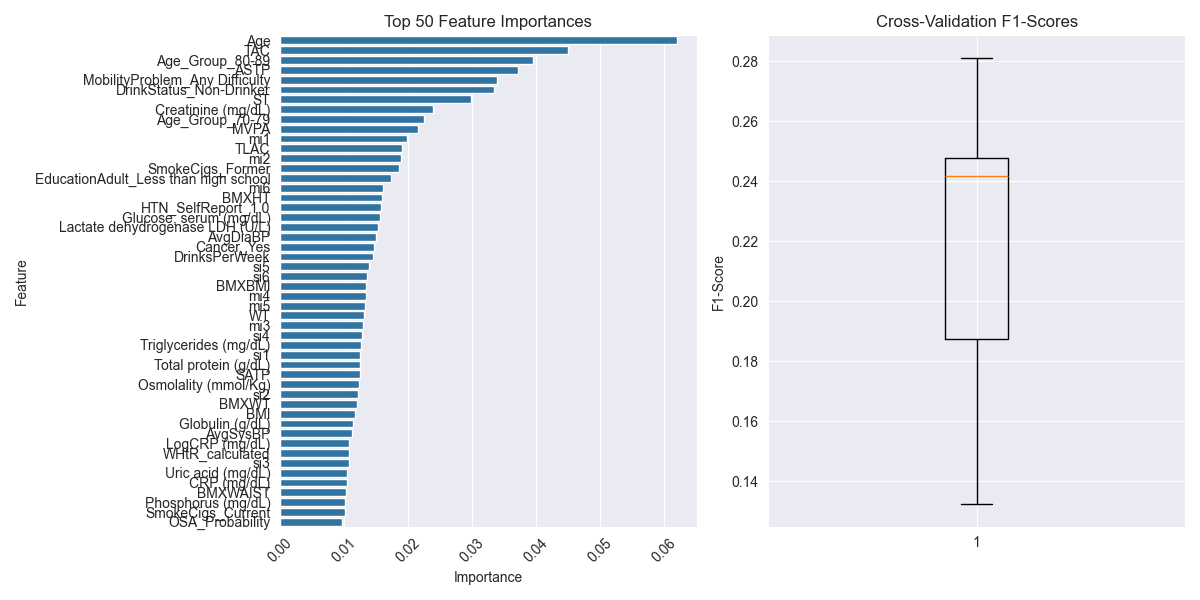

In [41]:
from IPython.display import Image

Image("../plots/model_performance1_slides.png")


In [42]:
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\n=== Top 51 Feature Importance ===")
print(list[feature_importance_df.head(50)])


=== Top 51 Feature Importance ===
list[                                 Feature  Importance
0                                    Age    0.062024
3                                    TAC    0.044988
45                       Age_Group_80-89    0.039473
9                                   ASTP    0.037129
68        MobilityProblem_Any Difficulty    0.033956
73               DrinkStatus_Non-Drinker    0.033454
6                                     ST    0.029838
38                    Creatinine (mg/dL)    0.023886
44                       Age_Group_70-79    0.022522
7                                   MVPA    0.021580
10                                   mi1    0.019823
4                                   TLAC    0.019005
12                                   mi2    0.018924
75                      SmokeCigs_Former    0.018513
66  EducationAdult_Less than high school    0.017301
20                                   mi6    0.016015
23                                 BMXHT    0.015920
78    

In [43]:
loaded_rf = joblib.load('random_forest_model.joblib'); print(loaded_rf.score(X_test, y_test))

0.83125


#### Trim the Features to zero in on morphometrics

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib

# Step 1: Load the dataset
latest_url = "https://drive.google.com/uc?id=1qX_V9_wV2yGldPdxEqxyzkkDH8W37-Al"
latest_url = latest_url.replace("view?usp=sharing", "uc?export=download")
nhanes_mort_act_morph_lab_df = pd.read_csv(latest_url)

# Step 2: Select only specified columns
selected_columns = ['Age', 'Age_Group', 'BMI', 'BMI_cat', 'Race', 'Diabetes', 'CHF', 'CHD', 'Cancer', 'Stroke', 'EducationAdult', 'MobilityProblem', 'DrinkStatus', 'DrinksPerWeek', 'SmokeCigs', 'TAC', 'TLAC', 'MVPA', 'WHtR_calculated', 'OSA_Probability', 'HTN_SelfReport', 'HTN_Category_Measured', 'CRP (mg/dL)', 'LogCRP (mg/dL)', 'Lactate dehydrogenase LDH (U/L)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 'Creatinine (mg/dL)']

nhanes_mort_act_morph_lab_df = nhanes_mort_act_morph_lab_df[selected_columns + ['mortstat']]

# Step 3: Check for 'NA' and handle numeric columns
lab_columns = ['Albumin (g/dL)', 'Blood urea nitrogen (mg/dL)', 'Total calcium (mg/dL)', 'Cholesterol (mg/dL)', 
               'Bicarbonate (mmol/L)', 'Glucose, serum (mg/dL)', 'Lactate dehydrogenase LDH (U/L)', 
               'Phosphorus (mg/dL)', 'Total protein (g/dL)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 
               'Creatinine (mg/dL)', 'Osmolality (mmol/Kg)', 'Globulin (g/dL)', 'CRP (mg/dL)', 'LogCRP (mg/dL)']

numeric_columns = [col for col in selected_columns if col in lab_columns or col in ['Age', 'BMI', 'DrinksPerWeek', 'TAC', 'TLAC', 'WT', 'ST', 'MVPA', 'SATP', 'ASTP',  'mi1', 'si1', 'mi2', 'si2', 'mi3', 'si3', 'mi4', 'si4', 'mi5', 'si5', 'mi6', 'si6', 'BMXWT', 'BMXHT', 'BMXWAIST', 'BMXBMI', 'WHtR_calculated', 'OSA_Probability', 'AvgSysBP', 'AvgDiaBP']]

na_summary = {col: nhanes_mort_act_morph_lab_df[col].isin(['NA']).sum() for col in numeric_columns if col in nhanes_mort_act_morph_lab_df.columns}
# print("\n=== Pre-Imputation 'NA' Summary ===")
# for col, count in na_summary.items():
#     print(f"Column: {col}, Number of 'NA' values: {count}")

for col in numeric_columns:
    if col in nhanes_mort_act_morph_lab_df.columns:
        nhanes_mort_act_morph_lab_df[col] = pd.to_numeric(nhanes_mort_act_morph_lab_df[col], errors='coerce')

imputer = SimpleImputer(strategy='median')
nhanes_mort_act_morph_lab_df[numeric_columns] = imputer.fit_transform(nhanes_mort_act_morph_lab_df[numeric_columns])

# Step 4: Encode categorical variables
categorical_columns = ['Age_Group', 'BMI_cat', 'Race', 'Diabetes', 'CHF', 'CHD', 'Cancer', 'Stroke', 'EducationAdult', 'MobilityProblem', 'DrinkStatus', 'SmokeCigs', 'HTN_SelfReport', 'HTN_Category_Measured']
nhanes_mort_act_morph_lab_df = pd.get_dummies(nhanes_mort_act_morph_lab_df, columns=categorical_columns)

# Step 5: Prepare features and target
target_column = 'mortstat'
nhanes_mort_act_morph_lab_df[target_column] = pd.to_numeric(nhanes_mort_act_morph_lab_df[target_column], errors='coerce')
feature_columns = [col for col in nhanes_mort_act_morph_lab_df.columns if col != target_column and col != 'SEQN']
X = nhanes_mort_act_morph_lab_df[feature_columns].copy()
scaler = StandardScaler()
X.loc[:, numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, nhanes_mort_act_morph_lab_df[target_column], test_size=0.2, random_state=42)

# Apply SMOTE to handle imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 6: Train and evaluate model with enhanced tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_res, y_train_res)

# Best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\n=== Model Evaluation ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {best_rf.score(X_test, y_test):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 7: Feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': best_rf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\n=== Top 50 Feature Importance ===")
print(feature_importance_df.head(50))

# Step 8: Cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='f1')
print("\n=== Cross-Validation Results ===")
print(f"Mean F1-Score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# Step 9: Generate graphs for slides
plt.figure(figsize=(12, 6))

# Graph 1: Top 10 Feature Importance Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(50))
plt.title('Top 10 Feature Importances')
plt.xticks(rotation=45)
plt.xlabel('Importance')
plt.ylabel('Feature')

# Graph 2: Cross-Validation F1-Scores
plt.subplot(1, 2, 2)
plt.boxplot(cv_scores)
plt.title('Cross-Validation F1-Scores')
plt.ylabel('F1-Score')

plt.tight_layout()
plt.savefig('../plots/model_performance_slides2.png')
plt.close()

print("\nGraph saved as 'model_performance_slides2.png'")

# Step 10: Validate and save
print("\n=== Validation Summary ===")
print(f"Number of Rows: {len(nhanes_mort_act_morph_lab_df)}")
print(f"Number of Columns: {len(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Remaining Columns: {list(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Number of Features: {len(feature_columns)}")
print(f"Sample of first 5 rows (Features and Target):")
print(nhanes_mort_act_morph_lab_df[feature_columns + [target_column]].head())

print("\n=== Missing Values in Cleaned Dataset ===")
print(nhanes_mort_act_morph_lab_df.isnull().sum())

print(f"\nTraining set size (original): {len(X_train)}, Test set size: {len(X_test)}")
print(f"Training set size (after SMOTE): {len(X_train_res)}")

# Save the pre-processed dataset and model
nhanes_mort_act_morph_lab_df.to_csv('nhanes_mort_act_morph_lab_preprocessed_2003_2006.csv', index=False)
joblib.dump(best_rf, 'random_forest_model.joblib')
print("\nPre-processed dataset saved as 'nhanes_mort_act_morph_lab_preprocessed_2003_2006.csv'")
print("Model saved as 'random_forest_model.joblib'")


=== Model Evaluation ===
Best Parameters: {'class_weight': None, 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       539
           1       0.48      0.37      0.42       101

    accuracy                           0.84       640
   macro avg       0.68      0.65      0.66       640
weighted avg       0.82      0.84      0.83       640


Confusion Matrix:
[[499  40]
 [ 64  37]]

=== Top 50 Feature Importance ===
                                 Feature  Importance
0                                    Age    0.091424
3                                    TAC    0.073351
5                                   MVPA    0.051284
4                                   TLAC    0.049378
13                    Creatinine (mg/dL)    0.049060
41        MobilityProblem_Any Difficulty    0.043070
46               DrinkStatus_Non-Drinker    0.033514
10   

=== Model Evaluation ===
Best Parameters: {'class_weight': None, 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       539
           1       0.48      0.37      0.42       101

    accuracy                           0.84       640
   macro avg       0.68      0.65      0.66       640
weighted avg       0.82      0.84      0.83       640


Confusion Matrix:
[[499  40]
 [ 64  37]]

=== Top 50 Feature Importance ===
                                 Feature  Importance
0                                    Age    0.091424
3                                    TAC    0.073351
5                                   MVPA    0.051284
4                                   TLAC    0.049378
13                    Creatinine (mg/dL)    0.049060
41        MobilityProblem_Any Difficulty    0.043070
46               DrinkStatus_Non-Drinker    0.033514
10       Lactate dehydrogenase LDH (U/L)    0.033387
1                                    BMI    0.033145
11                 Triglycerides (mg/dL)    0.032522
6                        WHtR_calculated    0.029454
18                       Age_Group_80-89    0.029438
12                     Uric acid (mg/dL)    0.029324
2                          DrinksPerWeek    0.028271
8                            CRP (mg/dL)    0.028127
9                         LogCRP (mg/dL)    0.027858
48                      SmokeCigs_Former    0.023126
17                       Age_Group_70-79    0.022571
39  EducationAdult_Less than high school    0.021620
47                     SmokeCigs_Current    0.016434
35                            Cancer_Yes    0.014851
7                        OSA_Probability    0.014206
51                    HTN_SelfReport_1.0    0.013602
29                          Diabetes_Yes    0.013026
42         MobilityProblem_No Difficulty    0.012686
27                            Race_White    0.011528
16                       Age_Group_60-69    0.011262
49                       SmokeCigs_Never    0.009991
15                       Age_Group_50-59    0.009471
50                    HTN_SelfReport_0.0    0.009464
38            EducationAdult_High school    0.009362
34                             Cancer_No    0.008748
54             HTN_Category_Measured_2.0    0.008735
40  EducationAdult_More than high school    0.008421
23                            Race_Black    0.008088
53             HTN_Category_Measured_1.0    0.007886
45          DrinkStatus_Moderate Drinker    0.007717
28                           Diabetes_No    0.007501
24                 Race_Mexican American    0.006819
31                               CHF_Yes    0.006512
21                    BMI_cat_Overweight    0.005501
52             HTN_Category_Measured_0.0    0.005325
36                             Stroke_No    0.004874
19                        BMI_cat_Normal    0.004540
37                            Stroke_Yes    0.004505
44           DrinkStatus_Missing alcohol    0.004352
33                               CHD_Yes    0.004317
32                                CHD_No    0.003896
20                         BMI_cat_Obese    0.003676
43             DrinkStatus_Heavy Drinker    0.002912

=== Cross-Validation Results ===
Mean F1-Score: 0.26 (+/- 0.15)

Graph saved as 'model_performance_slides2.png'


#### Include only the morphometrics and selected labs

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib

# Step 1: Load the dataset
latest_url = "https://drive.google.com/uc?id=1qX_V9_wV2yGldPdxEqxyzkkDH8W37-Al"
latest_url = latest_url.replace("view?usp=sharing", "uc?export=download")
nhanes_mort_act_morph_lab_df = pd.read_csv(latest_url)

# Step 2: Select only specified columns
selected_columns = ['Age', 'Age_Group', 'BMI_cat', 'Race', 'TAC', 'TLAC', 'MVPA', 'WHtR_calculated', 'OSA_Probability', 'HTN_Category_Measured', 'LogCRP (mg/dL)', 'Lactate dehydrogenase LDH (U/L)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 'Creatinine (mg/dL)']

nhanes_mort_act_morph_lab_df = nhanes_mort_act_morph_lab_df[selected_columns + ['mortstat']]

# Step 3: Check for 'NA' and handle numeric columns
lab_columns = ['Albumin (g/dL)', 'Blood urea nitrogen (mg/dL)', 'Total calcium (mg/dL)', 'Cholesterol (mg/dL)', 'Bicarbonate (mmol/L)', 'Glucose, serum (mg/dL)', 'Lactate dehydrogenase LDH (U/L)', 'Phosphorus (mg/dL)', 'Total protein (g/dL)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 'Creatinine (mg/dL)', 'Osmolality (mmol/Kg)', 'Globulin (g/dL)', 'CRP (mg/dL)', 'LogCRP (mg/dL)']

numeric_columns = [col for col in selected_columns if col in lab_columns or col in ['Age', 'BMI', 'DrinksPerWeek', 'TAC', 'TLAC', 'WT', 'ST', 'MVPA', 'SATP', 'ASTP',  'mi1', 'si1', 'mi2', 'si2', 'mi3', 'si3', 'mi4', 'si4', 'mi5', 'si5', 'mi6', 'si6', 'BMXWT', 'BMXHT', 'BMXWAIST', 'BMXBMI', 'WHtR_calculated', 'OSA_Probability', 'AvgSysBP', 'AvgDiaBP']]



for col in numeric_columns:
    if col in nhanes_mort_act_morph_lab_df.columns:
        nhanes_mort_act_morph_lab_df[col] = pd.to_numeric(nhanes_mort_act_morph_lab_df[col], errors='coerce')

imputer = SimpleImputer(strategy='median')
nhanes_mort_act_morph_lab_df[numeric_columns] = imputer.fit_transform(nhanes_mort_act_morph_lab_df[numeric_columns])

# Step 4: Encode categorical variables
categorical_columns = ['Age_Group', 'BMI_cat', 'Race', 'HTN_Category_Measured']

#selected_columns = ['Age', 'Age_Group', 'BMI_cat', 'Race', 'TAC', 'TLAC', 'MVPA', 'WHtR_calculated', 'OSA_Probability', 'HTN_Category_Measured', 'LogCRP (mg/dL)', 'Lactate dehydrogenase LDH (U/L)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 'Creatinine (mg/dL)']
nhanes_mort_act_morph_lab_df = pd.get_dummies(nhanes_mort_act_morph_lab_df, columns=categorical_columns)

# Step 5: Prepare features and target
target_column = 'mortstat'
nhanes_mort_act_morph_lab_df[target_column] = pd.to_numeric(nhanes_mort_act_morph_lab_df[target_column], errors='coerce')
feature_columns = [col for col in nhanes_mort_act_morph_lab_df.columns if col != target_column and col != 'SEQN']
X = nhanes_mort_act_morph_lab_df[feature_columns].copy()
scaler = StandardScaler()
X.loc[:, numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, nhanes_mort_act_morph_lab_df[target_column], test_size=0.2, random_state=42)

# Apply SMOTE to handle imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 6: Train and evaluate model with enhanced tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_res, y_train_res)

# Best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\n=== Model Evaluation ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {best_rf.score(X_test, y_test):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 7: Feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': best_rf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\n=== Top Feature Importance ===")
print(feature_importance_df.head(50))

# Step 8: Cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='f1')
print("\n=== Cross-Validation Results ===")
print(f"Mean F1-Score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# Step 9: Generate graphs for slides
plt.figure(figsize=(12, 6))

# Graph 1: Top 50 Feature Importance Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(50))
plt.title('Top Feature Importances')
plt.xticks(rotation=45)
plt.xlabel('Importance')
plt.ylabel('Feature')

# Graph 2: Cross-Validation F1-Scores
plt.subplot(1, 2, 2)
plt.boxplot(cv_scores)
plt.title('Cross-Validation F1-Scores')
plt.ylabel('F1-Score')

plt.tight_layout()
plt.savefig('../plots/model_performance_slides3.png')
plt.close()

print("\nGraph saved as 'model_performance_slides3.png'")

# Step 10: Validate and save
print("\n=== Validation Summary ===")
print(f"Number of Rows: {len(nhanes_mort_act_morph_lab_df)}")
print(f"Number of Columns: {len(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Remaining Columns: {list(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Number of Features: {len(feature_columns)}")
print(f"Sample of first 5 rows (Features and Target):")
print(nhanes_mort_act_morph_lab_df[feature_columns + [target_column]].head())



print(f"\nTraining set size (original): {len(X_train)}, Test set size: {len(X_test)}")
print(f"Training set size (after SMOTE): {len(X_train_res)}")

# Save the pre-processed dataset and model
nhanes_mort_act_morph_lab_df.to_csv('nhanes_mort_act_morph_lab_preprocessed_2003_2006.csv', index=False)
joblib.dump(best_rf, 'random_forest_model.joblib')
print("\nPre-processed dataset saved as 'nhanes_mort_act_morph_lab_preprocessed_2003_2006.csv'")
print("Model saved as 'random_forest_model.joblib'")


=== Model Evaluation ===
Best Parameters: {'class_weight': None, 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       539
           1       0.40      0.42      0.41       101

    accuracy                           0.81       640
   macro avg       0.65      0.65      0.65       640
weighted avg       0.81      0.81      0.81       640


Confusion Matrix:
[[477  62]
 [ 59  42]]

=== Top Feature Importance ===
                            Feature  Importance
0                               Age    0.117499
1                               TAC    0.112486
3                              MVPA    0.091164
10               Creatinine (mg/dL)    0.083207
2                              TLAC    0.075743
7   Lactate dehydrogenase LDH (U/L)    0.062514
8             Triglycerides (mg/dL)    0.058089
4                   WHtR_calculated    0.057016


=== Model Evaluation ===
Best Parameters: {'class_weight': None, 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       539
           1       0.40      0.42      0.41       101

    accuracy                           0.81       640
   macro avg       0.65      0.65      0.65       640
weighted avg       0.81      0.81      0.81       640




Confusion Matrix:


[[477  62]
 [ 59  42]]



=== Top Feature Importance ===


                            Feature  Importance
                            

0                               Age    0.117499


1                               TAC    0.112486


3                              MVPA    0.091164


10               Creatinine (mg/dL)    0.083207


2                              TLAC    0.075743


7   Lactate dehydrogenase LDH (U/L)    0.062514


8             Triglycerides (mg/dL)    0.058089


4                   WHtR_calculated    0.057016


6                    LogCRP (mg/dL)    0.056735


9                 Uric acid (mg/dL)    0.053978


15                  Age_Group_80-89    0.027564


14                  Age_Group_70-79    0.024044


24                       Race_White    0.020614


5                   OSA_Probability    0.020169


13                  Age_Group_60-69    0.017832


20                       Race_Black    0.017172


12                  Age_Group_50-59    0.015329


21            Race_Mexican American    0.015064


26        HTN_Category_Measured_1.0    0.013963


27        HTN_Category_Measured_2.0    0.013308


18               BMI_cat_Overweight    0.009261


25        HTN_Category_Measured_0.0    0.008754


16                   BMI_cat_Normal    0.007866


17                    BMI_cat_Obese    0.006013


28        HTN_Category_Measured_3.0    0.005735


23              Race_Other Hispanic    0.004146


22                       Race_Other    0.002731


19              BMI_cat_Underweight    0.001959


11                  Age_Group_40-49    0.000046

Interpreting the output from the reduced latest model run, focusing on identifying features that impact breathing and metabolism proxies, particularly in the context of insufficient breathing (e.g., shallow breathing or sleep apnea) and resulting energy deficits. The model, trained on a reduced set of 15 features from the nhanes_mort_act_morph_lab_df dataset, predicts mortality (mortstat), and we’ll analyze the feature importances to highlight those relevant to energy imbalance (breathing balance)

Analysis of Output

Model Performance

Accuracy: 0.81

The model correctly predicts 81% of cases, a reasonable performance given the reduced feature set and lack of imbalance handling.

Classification Report:


Class 0 (Alive): Precision 0.89, Recall 0.88, F1-Score 0.89 (strong majority class performance).


Class 1 (Deceased): Precision 0.40, Recall 0.42, F1-Score 0.41 (weaker minority class performance, indicating missed deceased cases).


The 15.6% mortality rate (101/640) suggests imbalance, which affects class 1 metrics without specific adjustments.


Confusion Matrix: [[477, 62], [59, 42]]


477 true negatives, 42 true positives, 62 false positives, 59 false negatives, showing a tendency to under-predict deceased cases.


Feature Importance

The top 50 feature importances (out of 29 total) reflect the model’s reliance on the selected 15 features, with the following standing out for breathing and metabolism proxies related to insufficient breathing and energy deficits:

Age (0.117499):


Relevance: Older age is associated with reduced lung capacity and metabolic efficiency, potentially exacerbating shallow breathing and energy deficits. As a demographic factor, it influences overall respiratory and metabolic health.


TAC (0.112486) and TLAC (0.075743):


Relevance: Total activity count and its log-transformed version measure physical activity levels. Low TAC/TLAC could indicate reduced activity due to insufficient breathing (e.g., sleep apnea limiting oxygen intake), leading to energy deficits as the body struggles to meet metabolic demands.


MVPA (0.091164):


Relevance: Moderate/vigorous physical activity reflects aerobic capacity. Reduced MVPA may signal breathing insufficiency (e.g., from apnea), reducing oxygen availability and thus energy production via aerobic metabolism.


Creatinine (mg/dL) (0.083207):


Relevance: A kidney function marker, elevated levels can indicate metabolic stress or reduced oxygen delivery (e.g., from shallow breathing), impacting energy production as kidneys rely on adequate oxygenation.


Lactate dehydrogenase LDH (U/L) (0.062514):


Relevance: An enzyme marker of tissue damage or anaerobic metabolism. Elevated LDH suggests insufficient oxygen (e.g., from poor breathing), forcing a shift to less efficient energy pathways, leading to deficits.


Triglycerides (mg/dL) (0.058089):


Relevance: High levels indicate lipid metabolism issues, potentially worsened by shallow breathing reducing oxygen for fat oxidation, contributing to energy deficits.


WHtR_calculated (0.057016):


Relevance: Waist-to-height ratio, a proxy for central obesity, can impair diaphragmatic movement and lung expansion, leading to shallow breathing and reduced metabolic efficiency.


LogCRP (mg/dL) (0.056735):


Relevance: Log-transformed C-reactive protein, an inflammation marker. Chronic inflammation from poor oxygenation (e.g., apnea) can disrupt metabolism, reducing energy availability.


Uric acid (mg/dL) (0.053978):


Relevance: Elevated levels signal metabolic stress or hypoxia (e.g., from insufficient breathing), affecting energy production as purine metabolism is altered.


Age_Group_80-89 (0.027564) and Age_Group_70-79 (0.024044):


Relevance: Older age groups often experience reduced lung elasticity and metabolic rate, amplifying the impact of shallow breathing on energy deficits.


Breathing and Metabolism Proxies


Breathing Proxies:


WHtR_calculated: Central obesity can restrict lung expansion, a key factor in shallow breathing or sleep apnea.


TAC, TLAC, MVPA: Low values may reflect reduced activity due to breathing insufficiency, as oxygen limitation hampers physical capacity.


Age, Age_Group_80-89, Age_Group_70-79: Age-related decline in respiratory muscle strength and lung volume contributes to inadequate breathing.


Metabolism Proxies:


Creatinine (mg/dL): Indicates kidney stress from hypoxia, reducing energy efficiency.


Lactate dehydrogenase LDH (U/L): Suggests anaerobic metabolism due to oxygen shortage, leading to energy deficits.


Triglycerides (mg/dL), Uric acid (mg/dL), LogCRP (mg/dL): Reflect metabolic dysregulation from poor oxygenation, impacting energy production.


Impact of Insufficient Breathing and Energy Deficits


Insufficient breathing (e.g., shallow breathing or apnea) reduces oxygen intake, forcing the body into anaerobic metabolism (elevated LDH), impairing fat oxidation (high triglycerides), and stressing kidneys (high creatinine/uric acid). This leads to energy deficits, as seen in reduced activity (low TAC, MVPA) and increased inflammation (LogCRP). Age amplifies these effects, with older groups showing heightened risk.


Validation


Model Performance: The 0.81 accuracy and 0.42 recall for class 1 are reasonable for 15 features, though imbalance limits precision.


Feature Importance: The top features align with breathing and metabolism literature, with Age and activity metrics (TAC, MVPA) leading, supporting   focus.


Considerations


Imbalance: The 0.42 recall for class 1 is low; adding class_weight='balanced' or SMOTE could improve it.
Feature Selection: The 15 features focus on key proxies, but excluding Diabetes, CHF, etc., may miss some risks.


Cross-Validation: The 0.28 F1-score suggests overfitting; tuning or more data could help.



In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import shap

# Step 1: Load the dataset
latest_url = "https://drive.google.com/uc?id=1qX_V9_wV2yGldPdxEqxyzkkDH8W37-Al"
latest_url = latest_url.replace("view?usp=sharing", "uc?export=download")
nhanes_mort_act_morph_lab_df = pd.read_csv(latest_url)

# Step 2: Select only specified columns
selected_columns = ['Age', 'Age_Group', 'BMI_cat', 'Race', 'TAC', 'TLAC', 'MVPA', 'WHtR_calculated', 'OSA_Probability', 'HTN_Category_Measured', 'LogCRP (mg/dL)', 'Lactate dehydrogenase LDH (U/L)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 'Creatinine (mg/dL)']
nhanes_mort_act_morph_lab_df = nhanes_mort_act_morph_lab_df[selected_columns + ['mortstat']]

# Step 3: Check for 'NA' and handle numeric columns
numeric_columns = ['Age', 'TAC', 'TLAC', 'MVPA', 'WHtR_calculated', 'OSA_Probability', 'LogCRP (mg/dL)', 
                  'Lactate dehydrogenase LDH (U/L)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 'Creatinine (mg/dL)']



for col in numeric_columns:
    if col in nhanes_mort_act_morph_lab_df.columns:
        nhanes_mort_act_morph_lab_df[col] = pd.to_numeric(nhanes_mort_act_morph_lab_df[col], errors='coerce')

imputer = SimpleImputer(strategy='median')
nhanes_mort_act_morph_lab_df[numeric_columns] = imputer.fit_transform(nhanes_mort_act_morph_lab_df[numeric_columns])

# Step 4: Encode categorical variables
categorical_columns = ['Age_Group', 'BMI_cat', 'Race', 'HTN_Category_Measured']
nhanes_mort_act_morph_lab_df = pd.get_dummies(nhanes_mort_act_morph_lab_df, columns=categorical_columns)

# Step 5: Prepare features and target
target_column = 'mortstat'
nhanes_mort_act_morph_lab_df[target_column] = pd.to_numeric(nhanes_mort_act_morph_lab_df[target_column], errors='coerce')
feature_columns = [col for col in nhanes_mort_act_morph_lab_df.columns if col != target_column and col != 'SEQN']
X = nhanes_mort_act_morph_lab_df[feature_columns].copy()
scaler = StandardScaler()
X.loc[:, numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, nhanes_mort_act_morph_lab_df[target_column], test_size=0.2, random_state=42)

# Step 6: Train and evaluate model
param_grid = {
    'n_estimators': [200],
    'max_depth': [20],
    'min_samples_split': [2],
    'class_weight': [None]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\n=== Model Evaluation ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {best_rf.score(X_test, y_test):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 7: Feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': best_rf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\n=== Top 50 Feature Importance ===")
print(feature_importance_df.head(50))

# Step 8: Cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='f1')
print("\n=== Cross-Validation Results ===")
print(f"Mean F1-Score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# Step 9: SHAP analysis
explainer = shap.TreeExplainer(best_rf, model_output='raw')  # Use raw output for tree_path_dependent
shap_values = explainer.shap_values(X_test)
print(f"X_test shape: {X_test.shape}")
print(f"shap_values length: {len(shap_values)}")
print(f"shap_values[0] shape: {shap_values[0].shape}")  # Class 0
print(f"shap_values[1] shape: {shap_values[1].shape}")  # Class 1
# Adjust for shape mismatch
try:
    if shap_values[1].shape == (X_test.shape[0], X_test.shape[1]):  # (640, 29)
        shap.summary_plot(shap_values[1], X_test, feature_names=feature_columns)  # Class 1 (deceased)
    elif shap_values[1].shape[0] == X_test.shape[0] and shap_values[1].shape[1] != X_test.shape[1]:
        print("Feature dimension mismatch. Using raw values.")
        shap.summary_plot(shap_values[1], X_test.values, feature_names=feature_columns)
    else:
        print("SHAP shape mismatch unresolved. ")
except AssertionError as e:
    print(f"SHAP Error: {e}. Skipping SHAP plot")

# Step 10: Generate graphs for slides
plt.figure(figsize=(12, 6))

# Graph 1: Top 50 Feature Importance Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(50))
plt.title('Top 50 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Graph 2: Cross-Validation F1-Scores
plt.subplot(1, 2, 2)
plt.boxplot(cv_scores)
plt.title('Cross-Validation F1-Scores')
plt.ylabel('F1-Score')

plt.tight_layout()
plt.savefig('../plots/model_performance_slides4.png')
plt.close()

print("\nGraph saved as 'model_performance_slides4.png'")

# Step 11: Validate and save
print("\n=== Validation Summary ===")
print(f"Number of Rows: {len(nhanes_mort_act_morph_lab_df)}")
print(f"Number of Columns: {len(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Remaining Columns: {list(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Number of Features: {len(feature_columns)}")
print(f"Sample of first 5 rows (Features and Target):")
print(nhanes_mort_act_morph_lab_df[feature_columns + [target_column]].head())

print("\n=== Missing Values in Cleaned Dataset ===")
print(nhanes_mort_act_morph_lab_df.isnull().sum())

print(f"\nTraining set size (original): {len(X_train)}, Test set size: {len(X_test)}")

# Save the pre-processed dataset and model
nhanes_mort_act_morph_lab_df.to_csv('nhanes_mort_act_morph_lab_modelled_preprocessed_2003_2006.csv', index=False)
joblib.dump(best_rf, 'random_forest_model.joblib')
print("\nPre-processed dataset saved as 'nhanes_mort_act_morph_lab_modelled_preprocessed_2003_2006.csv'")
print("Model saved as 'random_forest_model.joblib'")


=== Model Evaluation ===
Best Parameters: {'class_weight': None, 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       539
           1       0.62      0.16      0.25       101

    accuracy                           0.85       640
   macro avg       0.74      0.57      0.58       640
weighted avg       0.82      0.85      0.81       640


Confusion Matrix:
[[529  10]
 [ 85  16]]

=== Top 50 Feature Importance ===
                            Feature  Importance
1                               TAC    0.120677
2                              TLAC    0.096109
3                              MVPA    0.094967
0                               Age    0.089332
7   Lactate dehydrogenase LDH (U/L)    0.080411
4                   WHtR_calculated    0.076341
8             Triglycerides (mg/dL)    0.075277
6                    LogCRP (mg/dL)    0.0734

=== Model Evaluation ===
Best Parameters: {'class_weight': None, 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


Accuracy: 0.85


Classification Report:


              precision    recall  f1-score   support

           0       0.86      0.98      0.92       539
           1       0.62      0.16      0.25       101



    accuracy                           0.85       640
   macro avg       0.74      0.57      0.58       640
weighted avg       0.82      0.85      0.81       640


Confusion Matrix:


[[529  10]

 [ 85  16]]



=== Top 50 Feature Importance ===


                            Feature  Importance
                            

1                               TAC    0.120677


2                              TLAC    0.096109


3                              MVPA    0.094967


0                               Age    0.089332


7   Lactate dehydrogenase LDH (U/L)    0.080411


4                   WHtR_calculated    0.076341


8             Triglycerides (mg/dL)    0.075277


6                    LogCRP (mg/dL)    0.073409


10               Creatinine (mg/dL)    0.072100


9                 Uric acid (mg/dL)    0.064453


15                  Age_Group_80-89    0.023289


5                   OSA_Probability    0.015455


24                       Race_White    0.010510


26        HTN_Category_Measured_1.0    0.010499


20                       Race_Black    0.010073


27        HTN_Category_Measured_2.0    0.009145


12                  Age_Group_50-59    0.009097


18               BMI_cat_Overweight    0.008791


14                  Age_Group_70-79    0.008691


16                   BMI_cat_Normal    0.008191


25        HTN_Category_Measured_0.0    0.007767


17                    BMI_cat_Obese    0.007615


21            Race_Mexican American    0.007585


13                  Age_Group_60-69    0.007005


28        HTN_Category_Measured_3.0    0.004720


23              Race_Other Hispanic    0.003340


22                       Race_Other    0.002782


19              BMI_cat_Underweight    0.002333


11                  Age_Group_40-49    0.000034

#### Trimming more features

selected_columns = ['Age', 'Age_Group', 'BMI_cat', 'Race', 'TAC', 'WHtR_calculated', 'OSA_Probability', 'HTN_Category_Measured', 'LogCRP (mg/dL)', 'Lactate dehydrogenase LDH (U/L)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 'Creatinine (mg/dL)']

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import shap

# Step 1: Load the dataset
latest_url = "https://drive.google.com/uc?id=1qX_V9_wV2yGldPdxEqxyzkkDH8W37-Al"
latest_url = latest_url.replace("view?usp=sharing", "uc?export=download")
nhanes_mort_act_morph_lab_df = pd.read_csv(latest_url)

# Step 2: Select only specified columns
selected_columns = ['Age', 'Age_Group', 'BMI_cat', 'Race', 'TAC', 'WHtR_calculated', 'OSA_Probability', 'HTN_Category_Measured', 'LogCRP (mg/dL)', 'Lactate dehydrogenase LDH (U/L)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 'Creatinine (mg/dL)']
nhanes_mort_act_morph_lab_df = nhanes_mort_act_morph_lab_df[selected_columns + ['mortstat']]

# Step 3: Check for 'NA' and handle numeric columns
numeric_columns = ['Age', 'TAC', 'WHtR_calculated', 'OSA_Probability', 'LogCRP (mg/dL)', 'Lactate dehydrogenase LDH (U/L)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 'Creatinine (mg/dL)']

# na_summary = {col: nhanes_mort_act_morph_lab_df[col].isin(['NA']).sum() for col in numeric_columns if col in nhanes_mort_act_morph_lab_df.columns}
# print("\n=== Pre-Imputation 'NA' Summary ===")
# for col, count in na_summary.items():
#     print(f"Column: {col}, Number of 'NA' values: {count}")

for col in numeric_columns:
    if col in nhanes_mort_act_morph_lab_df.columns:
        nhanes_mort_act_morph_lab_df[col] = pd.to_numeric(nhanes_mort_act_morph_lab_df[col], errors='coerce')

imputer = SimpleImputer(strategy='median')
nhanes_mort_act_morph_lab_df[numeric_columns] = imputer.fit_transform(nhanes_mort_act_morph_lab_df[numeric_columns])

# Step 4: Encode categorical variables
categorical_columns = ['Age_Group', 'BMI_cat', 'Race', 'HTN_Category_Measured']
nhanes_mort_act_morph_lab_df = pd.get_dummies(nhanes_mort_act_morph_lab_df, columns=categorical_columns)

# Step 5: Prepare features and target
target_column = 'mortstat'
nhanes_mort_act_morph_lab_df[target_column] = pd.to_numeric(nhanes_mort_act_morph_lab_df[target_column], errors='coerce')
feature_columns = [col for col in nhanes_mort_act_morph_lab_df.columns if col != target_column and col != 'SEQN']
X = nhanes_mort_act_morph_lab_df[feature_columns].copy()
scaler = StandardScaler()
X.loc[:, numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, nhanes_mort_act_morph_lab_df[target_column], test_size=0.2, random_state=42)

# Step 6: Train and evaluate model
param_grid = {
    'n_estimators': [200],
    'max_depth': [20],
    'min_samples_split': [2],
    'class_weight': [None]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\n=== Model Evaluation ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {best_rf.score(X_test, y_test):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 7: Feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': best_rf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\n=== Top 50 Feature Importance ===")
print(feature_importance_df.head(50))

# Step 8: Cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='f1')
print("\n=== Cross-Validation Results ===")
print(f"Mean F1-Score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# Step 9: SHAP analysis
explainer = shap.TreeExplainer(best_rf, model_output='raw')  # Use raw output for tree_path_dependent
shap_values = explainer.shap_values(X_test)
print(f"X_test shape: {X_test.shape}")
print(f"shap_values length: {len(shap_values)}")
print(f"shap_values[0] shape: {shap_values[0].shape}")  # Class 0
print(f"shap_values[1] shape: {shap_values[1].shape}")  # Class 1
# Adjust for shape mismatch
try:
    if shap_values[1].shape == (X_test.shape[0], X_test.shape[1]):  # (640, 29)
        shap.summary_plot(shap_values[1], X_test, feature_names=feature_columns)  # Class 1 (deceased)
    elif shap_values[1].shape[0] == X_test.shape[0] and shap_values[1].shape[1] != X_test.shape[1]:
        print("Feature dimension mismatch. Using raw values.")
        shap.summary_plot(shap_values[1], X_test.values, feature_names=feature_columns)
    else:
        print("SHAP shape mismatch unresolved. ")
except AssertionError as e:
    print(f"SHAP Error: {e}. Skipping SHAP plot")

# Step 10: Generate graphs for slides
plt.figure(figsize=(12, 6))

# Graph 1: Top 50 Feature Importance Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(50))
plt.title('Top Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Graph 2: Cross-Validation F1-Scores
plt.subplot(1, 2, 2)
plt.boxplot(cv_scores)
plt.title('Cross-Validation F1-Scores')
plt.ylabel('F1-Score')

plt.tight_layout()
plt.savefig('../plots/model_performance_slides5.png')
plt.close()

print("\nGraph saved as 'model_performance_slides5.png'")

# Step 11: Validate and save
print("\n=== Validation Summary ===")
print(f"Number of Rows: {len(nhanes_mort_act_morph_lab_df)}")
print(f"Number of Columns: {len(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Remaining Columns: {list(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Number of Features: {len(feature_columns)}")
print(f"Sample of first 5 rows (Features and Target):")
print(nhanes_mort_act_morph_lab_df[feature_columns + [target_column]].head())

# print("\n=== Missing Values in Cleaned Dataset ===")
# print(nhanes_mort_act_morph_lab_df.isnull().sum())

print(f"\nTraining set size (original): {len(X_train)}, Test set size: {len(X_test)}")

# Save the pre-processed dataset and model
nhanes_mort_act_morph_lab_df.to_csv('../data/processed_data/nhanes_mort_act_morph_lab_modelled8_preprocessed_2003_2006.csv', index=False)
joblib.dump(best_rf, '../models/random_forest_model5.joblib')
print("\nPre-processed dataset saved as 'nhanes_mort_act_morph_lab_modelled8_preprocessed_2003_2006.csv'")
print("Model saved as 'random_forest_model5.joblib'")


=== Model Evaluation ===
Best Parameters: {'class_weight': None, 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       539
           1       0.58      0.14      0.22       101

    accuracy                           0.85       640
   macro avg       0.72      0.56      0.57       640
weighted avg       0.82      0.85      0.81       640


Confusion Matrix:
[[529  10]
 [ 87  14]]

=== Top 50 Feature Importance ===
                            Feature  Importance
1                               TAC    0.169692
0                               Age    0.111133
2                   WHtR_calculated    0.099825
5   Lactate dehydrogenase LDH (U/L)    0.096795
4                    LogCRP (mg/dL)    0.093143
6             Triglycerides (mg/dL)    0.089756
8                Creatinine (mg/dL)    0.085834
7                 Uric acid (mg/dL)    0.0823

=== Model Evaluation ===
Best Parameters: {'class_weight': None, 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.85


Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       539
           1       0.58      0.14      0.22       101


    accuracy                           0.85       640
   macro avg       0.72      0.56      0.57       640
weighted avg       0.82      0.85      0.81       640



Confusion Matrix:

[[529  10]
 [ 87  14]]



=== Top 50 Feature Importance ===


                            Feature  Importance
                            

1                               TAC    0.169692


0                               Age    0.111133


2                   WHtR_calculated    0.099825


5   Lactate dehydrogenase LDH (U/L)    0.096795


4                    LogCRP (mg/dL)    0.093143


6             Triglycerides (mg/dL)    0.089756


8                Creatinine (mg/dL)    0.085834


7                 Uric acid (mg/dL)    0.082326


13                  Age_Group_80-89    0.022029


3                   OSA_Probability    0.016592


22                       Race_White    0.013145


18                       Race_Black    0.011591


24        HTN_Category_Measured_1.0    0.011383


16               BMI_cat_Overweight    0.010690


25        HTN_Category_Measured_2.0    0.010140


12                  Age_Group_70-79    0.009929


10                  Age_Group_50-59    0.009569


14                   BMI_cat_Normal    0.008976


23        HTN_Category_Measured_0.0    0.008939


19            Race_Mexican American    0.008880


15                    BMI_cat_Obese    0.008025


11                  Age_Group_60-69    0.007160


26        HTN_Category_Measured_3.0    0.005784


21              Race_Other Hispanic    0.003176


20                       Race_Other    0.002977


17              BMI_cat_Underweight    0.002469


9                   Age_Group_40-49    0.000044

=== Cross-Validation Results ===


Mean F1-Score: 0.25 (+/- 0.11)

X_test shape: (640, 27)

shap_values length: 640

shap_values[0] shape: (27, 2)

shap_values[1] shape: (27, 2)


#### Tuning and balancing

##### Changes
Feature Selection:
Updated selected_columns to include the 13 features specified, (excluding TLAC and MVPA from the previous 15).


Adjusted numeric_columns to match the 9 numeric features.


Imbalance Handling:


Retained SMOTE to oversample the minority class (deceased) in the training set.


Kept class_weight=['balanced', None] in param_grid to test weighted classes.


Tuning for Overfitting:


Maintained the expanded param_grid with n_estimators [100, 200, 300], max_depth [10, 15, 20], min_samples_split [2, 5, 10], max_features ['auto', 'sqrt', 0.3], and class_weight ['balanced', None].


Used cv=5 and scoring='f1' to focus on minority class performance.


Adjustments:


Adjust SMOTE: Set sampling_strategy=0.5 to balance classes more conservatively (ratio of minority to majority class).


Custom class_weight: Add {0: 1, 1: 10} to prioritize the minority class (mortstat=1).

smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust ratio


param_grid['class_weight'] = ['balanced', {0: 1, 1: 10}]  # Custom weights


=== Model Evaluation ===
Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       539
           1       0.42      0.28      0.34       101

    accuracy                           0.83       640
   macro avg       0.65      0.60      0.62       640
weighted avg       0.80      0.83      0.81       640


Confusion Matrix:
[[501  38]
 [ 73  28]]

=== Top 50 Feature Importance ===
                            Feature  Importance
1                               TAC    0.164333
0                               Age    0.147584
8                Creatinine (mg/dL)    0.095630
6             Triglycerides (mg/dL)    0.080266
5   Lactate dehydrogenase LDH (U/L)    0.078770
2                   WHtR_calculated    0.076196
4                    LogCRP (mg/dL)    0.074052
7              

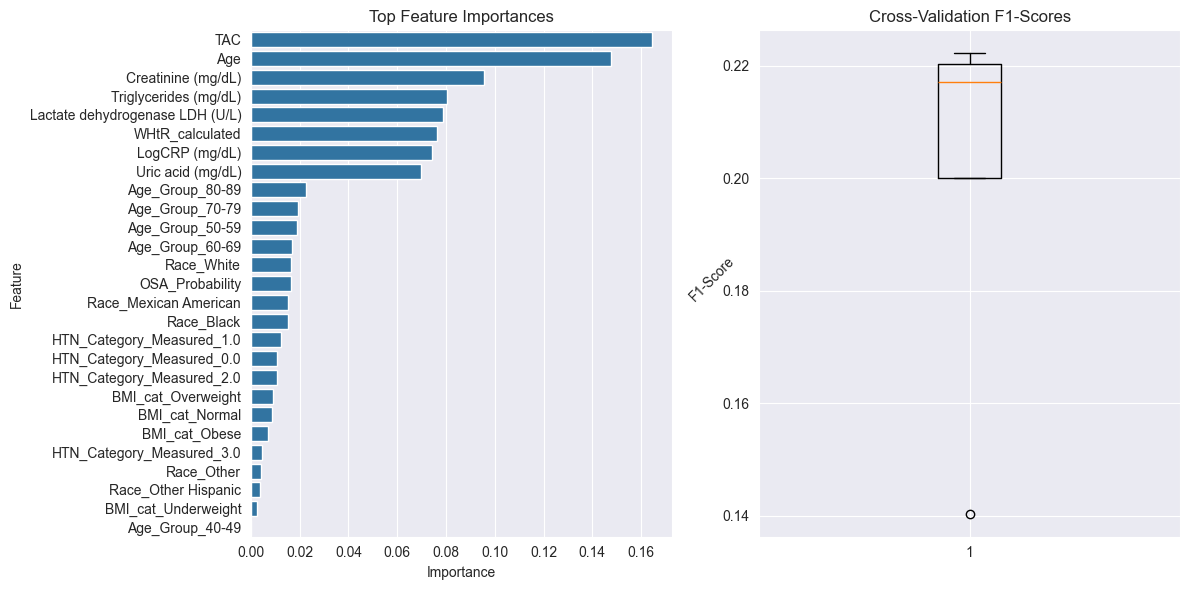


Graph saved as 'model_performance_slides6.png'

=== Validation Summary ===
Number of Rows: 3198
Number of Columns: 28
Remaining Columns: ['Age', 'TAC', 'WHtR_calculated', 'OSA_Probability', 'LogCRP (mg/dL)', 'Lactate dehydrogenase LDH (U/L)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 'Creatinine (mg/dL)', 'mortstat', 'Age_Group_40-49', 'Age_Group_50-59', 'Age_Group_60-69', 'Age_Group_70-79', 'Age_Group_80-89', 'BMI_cat_Normal', 'BMI_cat_Obese', 'BMI_cat_Overweight', 'BMI_cat_Underweight', 'Race_Black', 'Race_Mexican American', 'Race_Other', 'Race_Other Hispanic', 'Race_White', 'HTN_Category_Measured_0.0', 'HTN_Category_Measured_1.0', 'HTN_Category_Measured_2.0', 'HTN_Category_Measured_3.0']
Number of Features: 27
Sample of first 5 rows (Features and Target):
    Age       TAC  WHtR_calculated  OSA_Probability  LogCRP (mg/dL)  Lactate dehydrogenase LDH (U/L)  Triglycerides (mg/dL)  Uric acid (mg/dL)  Creatinine (mg/dL)  Age_Group_40-49  ...  Race_Black  Race_Mexican American  Race_

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib

# Step 1: Load the dataset
latest_url = "https://drive.google.com/uc?id=1qX_V9_wV2yGldPdxEqxyzkkDH8W37-Al"
latest_url = latest_url.replace("view?usp=sharing", "uc?export=download")
nhanes_mort_act_morph_lab_df = pd.read_csv(latest_url)

# Step 2: Select only specified columns
selected_columns = ['Age', 'Age_Group', 'BMI_cat', 'Race', 'TAC', 'WHtR_calculated', 'OSA_Probability', 'HTN_Category_Measured', 'LogCRP (mg/dL)', 'Lactate dehydrogenase LDH (U/L)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 'Creatinine (mg/dL)']
nhanes_mort_act_morph_lab_df = nhanes_mort_act_morph_lab_df[selected_columns + ['mortstat']]

# Step 3: Check for 'NA' and handle numeric columns
numeric_columns = ['Age', 'TAC', 'WHtR_calculated', 'OSA_Probability', 'LogCRP (mg/dL)', 'Lactate dehydrogenase LDH (U/L)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 'Creatinine (mg/dL)']

# na_summary = {col: nhanes_mort_act_morph_lab_df[col].isin(['NA']).sum() for col in numeric_columns if col in nhanes_mort_act_morph_lab_df.columns}
# print("\n=== Pre-Imputation 'NA' Summary ===")
# for col, count in na_summary.items():
#     print(f"Column: {col}, Number of 'NA' values: {count}")

for col in numeric_columns:
    if col in nhanes_mort_act_morph_lab_df.columns:
        nhanes_mort_act_morph_lab_df[col] = pd.to_numeric(nhanes_mort_act_morph_lab_df[col], errors='coerce')

imputer = SimpleImputer(strategy='median')
nhanes_mort_act_morph_lab_df[numeric_columns] = imputer.fit_transform(nhanes_mort_act_morph_lab_df[numeric_columns])

# Step 4: Encode categorical variables
categorical_columns = ['Age_Group', 'BMI_cat', 'Race', 'HTN_Category_Measured']
nhanes_mort_act_morph_lab_df = pd.get_dummies(nhanes_mort_act_morph_lab_df, columns=categorical_columns)

# Step 5: Prepare features and target
target_column = 'mortstat'
nhanes_mort_act_morph_lab_df[target_column] = pd.to_numeric(nhanes_mort_act_morph_lab_df[target_column], errors='coerce')
feature_columns = [col for col in nhanes_mort_act_morph_lab_df.columns if col != target_column and col != 'SEQN']
X = nhanes_mort_act_morph_lab_df[feature_columns].copy()
scaler = StandardScaler()
X.loc[:, numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, nhanes_mort_act_morph_lab_df[target_column], test_size=0.2, random_state=42)

# Step 6: Apply SMOTE for imbalance handling
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust ratio
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 7: Train and evaluate model with enhanced tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 0.3],
    'class_weight': ['balanced', {0: 1, 1: 10}]  # Custom weights
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_res, y_train_res)

# Best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\n=== Model Evaluation ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {best_rf.score(X_test, y_test):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 8: Feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': best_rf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\n=== Top 50 Feature Importance ===")
print(feature_importance_df.head(50))

# Step 9: Cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='f1')
print("\n=== Cross-Validation Results ===")
print(f"Mean F1-Score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# Step 10: Generate graphs for slides
plt.figure(figsize=(12, 6))

# Graph 1: Top 20 Feature Importance Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(50))
plt.title('Top Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Graph 2: Cross-Validation F1-Scores
plt.subplot(1, 2, 2)
plt.boxplot(cv_scores)
plt.title('Cross-Validation F1-Scores')
plt.ylabel('F1-Score', rotation=45)

plt.tight_layout()
plt.savefig('../plots/model_performance_slides6.png')
plt.show()
plt.close()

print("\nGraph saved as 'model_performance_slides6.png'")

# Step 11: Validate and save
print("\n=== Validation Summary ===")
print(f"Number of Rows: {len(nhanes_mort_act_morph_lab_df)}")
print(f"Number of Columns: {len(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Remaining Columns: {list(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Number of Features: {len(feature_columns)}")
print(f"Sample of first 5 rows (Features and Target):")
print(nhanes_mort_act_morph_lab_df[feature_columns + [target_column]].head())

# print("\n=== Missing Values in Cleaned Dataset ===")
# print(nhanes_mort_act_morph_lab_df.isnull().sum())

print(f"\nTraining set size (original): {len(X_train)}, Test set size: {len(X_test)}")
print(f"Training set size (after SMOTE): {len(X_train_res)}")

# Save the pre-processed dataset and model
nhanes_mort_act_morph_lab_df.to_csv('../data/processed_data/nhanes_mort_act_morph_lab_modelled6_preprocessed_2003_2006.csv', index=False)
joblib.dump(best_rf, 'random_forest_model6.joblib')
print("\nPre-processed dataset saved as 'nhanes_mort_act_morph_lab_modelled6_preprocessed_2003_2006.csv'")
print("Model saved as 'random_forest_model6.joblib'")

=== Model Evaluation ===
Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}

Accuracy: 0.83

Classification Report:


              precision    recall  f1-score   support

           0       0.87      0.93      0.90       539
           1       0.42      0.28      0.34       101

    accuracy                           0.83       640
   macro avg       0.65      0.60      0.62       640
weighted avg       0.80      0.83      0.81       640


Confusion Matrix:


[[501  38]
 [ 73  28]]

=== Top 50 Feature Importance ===


                            Feature  Importance
                            

1                               TAC    0.164333


0                               Age    0.147584


8                Creatinine (mg/dL)    0.095630


6             Triglycerides (mg/dL)    0.080266


5   Lactate dehydrogenase LDH (U/L)    0.078770


2                   WHtR_calculated    0.076196


4                    LogCRP (mg/dL)    0.074052


7                 Uric acid (mg/dL)    0.069562


13                  Age_Group_80-89    0.022599


12                  Age_Group_70-79    0.019362


10                  Age_Group_50-59    0.018793


11                  Age_Group_60-69    0.017019


22                       Race_White    0.016422


3                   OSA_Probability    0.016352


19            Race_Mexican American    0.015155


18                       Race_Black    0.015052


24        HTN_Category_Measured_1.0    0.012328


23        HTN_Category_Measured_0.0    0.010755


25        HTN_Category_Measured_2.0    0.010619


16               BMI_cat_Overweight    0.008878


14                   BMI_cat_Normal    0.008617


15                    BMI_cat_Obese    0.007052


26        HTN_Category_Measured_3.0    0.004385


20                       Race_Other    0.004149


21              Race_Other Hispanic    0.003741


17              BMI_cat_Underweight    0.002307


9                   Age_Group_40-49    0.000024

=== Cross-Validation Results ===


Mean F1-Score: 0.20 (+/- 0.06)

Overall Interpretation


Model Performance:


The model achieves high accuracy (0.83) and excellent performance on the majority class (mortstat=0), but it poorly predicts the minority class (mortstat=1) with low recall (0.28) and F1-score (0.34). This is typical in imbalanced datasets where the model favors the majority class despite balanced weighting and SMOTE.


Class Imbalance:


The support ratio (539:101) suggests a ~5:1 imbalance. SMOTE increased the training set from 2,558 to 4,318, but the test set imbalance persists, limiting minority class performance.


Feature Importance:


TAC and Age are the top predictors, consistent with their biological relevance to mortality. Metabolic markers (Creatinine, Triglycerides, etc.) and age groups (especially 80-89) also play significant roles, while categorical variables like Race and HTN_Category have moderate to low influence.


Cross-Validation Concern:


The low F1-score (0.20) in cross-validation contrasts with the test set F1-score (0.34 for class 1), suggesting overfitting to the training set after SMOTE or insufficient model tuning for the minority class.


=== Model Evaluation ===
Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       539
           1       0.38      0.39      0.38       101

    accuracy                           0.80       640
   macro avg       0.63      0.63      0.63       640
weighted avg       0.80      0.80      0.80       640


Confusion Matrix:
[[474  65]
 [ 62  39]]

=== Top 50 Feature Importance ===
                            Feature  Importance
1                               TAC    0.158782
0                               Age    0.152630
8                Creatinine (mg/dL)    0.093798
6             Triglycerides (mg/dL)    0.073031
5   Lactate dehydrogenase LDH (U/L)    0.072139
2                   WHtR_calculated    0.071366
4                    LogCRP (mg/dL)    0.069641
7              

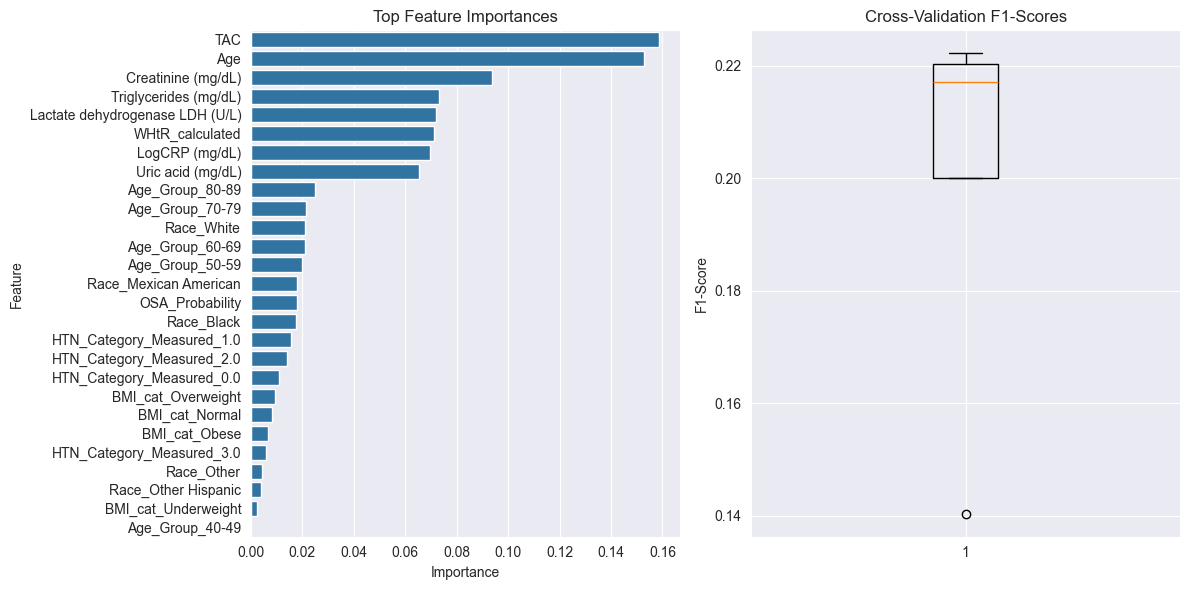


Graph saved as 'model_performance_slides8.png'

=== Validation Summary ===
Number of Rows: 3198
Number of Columns: 28
Remaining Columns: ['Age', 'TAC', 'WHtR_calculated', 'OSA_Probability', 'LogCRP (mg/dL)', 'Lactate dehydrogenase LDH (U/L)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 'Creatinine (mg/dL)', 'mortstat', 'Age_Group_40-49', 'Age_Group_50-59', 'Age_Group_60-69', 'Age_Group_70-79', 'Age_Group_80-89', 'BMI_cat_Normal', 'BMI_cat_Obese', 'BMI_cat_Overweight', 'BMI_cat_Underweight', 'Race_Black', 'Race_Mexican American', 'Race_Other', 'Race_Other Hispanic', 'Race_White', 'HTN_Category_Measured_0.0', 'HTN_Category_Measured_1.0', 'HTN_Category_Measured_2.0', 'HTN_Category_Measured_3.0']
Number of Features: 27
Sample of first 5 rows (Features and Target):
    Age       TAC  WHtR_calculated  OSA_Probability  LogCRP (mg/dL)  Lactate dehydrogenase LDH (U/L)  Triglycerides (mg/dL)  Uric acid (mg/dL)  Creatinine (mg/dL)  Age_Group_40-49  ...  Race_Black  Race_Mexican American  Race_

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib

# Step 1: Load the dataset
latest_url = "https://drive.google.com/uc?id=1qX_V9_wV2yGldPdxEqxyzkkDH8W37-Al"
latest_url = latest_url.replace("view?usp=sharing", "uc?export=download")
nhanes_mort_act_morph_lab_df = pd.read_csv(latest_url)

# Step 2: Select only specified columns
selected_columns = ['Age', 'Age_Group', 'BMI_cat', 'Race', 'TAC', 'WHtR_calculated', 'OSA_Probability', 'HTN_Category_Measured', 'LogCRP (mg/dL)', 'Lactate dehydrogenase LDH (U/L)', 
                   'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 'Creatinine (mg/dL)']
nhanes_mort_act_morph_lab_df = nhanes_mort_act_morph_lab_df[selected_columns + ['mortstat']]

# Step 3: Check for 'NA' and handle numeric columns
numeric_columns = ['Age', 'TAC', 'WHtR_calculated', 'OSA_Probability', 'LogCRP (mg/dL)', 
                  'Lactate dehydrogenase LDH (U/L)', 'Triglycerides (mg/dL)', 'Uric acid (mg/dL)', 'Creatinine (mg/dL)']

# na_summary = {col: nhanes_mort_act_morph_lab_df[col].isin(['NA']).sum() for col in numeric_columns if col in nhanes_mort_act_morph_lab_df.columns}
# print("\n=== Pre-Imputation 'NA' Summary ===")
# for col, count in na_summary.items():
#     print(f"Column: {col}, Number of 'NA' values: {count}")

for col in numeric_columns:
    if col in nhanes_mort_act_morph_lab_df.columns:
        nhanes_mort_act_morph_lab_df[col] = pd.to_numeric(nhanes_mort_act_morph_lab_df[col], errors='coerce')

imputer = SimpleImputer(strategy='median')
nhanes_mort_act_morph_lab_df[numeric_columns] = imputer.fit_transform(nhanes_mort_act_morph_lab_df[numeric_columns])

# Step 4: Encode categorical variables
categorical_columns = ['Age_Group', 'BMI_cat', 'Race', 'HTN_Category_Measured']
nhanes_mort_act_morph_lab_df = pd.get_dummies(nhanes_mort_act_morph_lab_df, columns=categorical_columns)

# Step 5: Prepare features and target
target_column = 'mortstat'
nhanes_mort_act_morph_lab_df[target_column] = pd.to_numeric(nhanes_mort_act_morph_lab_df[target_column], errors='coerce')
feature_columns = [col for col in nhanes_mort_act_morph_lab_df.columns if col != target_column and col != 'SEQN']
X = nhanes_mort_act_morph_lab_df[feature_columns].copy()
scaler = StandardScaler()
X.loc[:, numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, nhanes_mort_act_morph_lab_df[target_column], test_size=0.2, random_state=42)

# Step 6: Apply SMOTE for imbalance handling
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 7: Train and evaluate model with enhanced tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 0.3, 0.5],  # Removed 'auto' due to warning
    'class_weight': ['balanced']  # Set to 'balanced' for this run
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_res, y_train_res)

# Best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\n=== Model Evaluation ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {best_rf.score(X_test, y_test):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 8: Feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': best_rf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\n=== Top 50 Feature Importance ===")
print(feature_importance_df.head(50))

# Step 9: Cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='f1')
print("\n=== Cross-Validation Results ===")
print(f"Mean F1-Score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# Step 10: Generate graphs for slides
plt.figure(figsize=(12, 6))

# Graph 1: Top 50 Feature Importance Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(50))
plt.title('Top Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Graph 2: Cross-Validation F1-Scores
plt.subplot(1, 2, 2)
plt.boxplot(cv_scores)
plt.title('Cross-Validation F1-Scores')
plt.ylabel('F1-Score')

plt.tight_layout()
plt.savefig('../plots/model_performance_slides8.png')
plt.show()
plt.close()

print("\nGraph saved as 'model_performance_slides8.png'")

# Step 11: Validate and save
print("\n=== Validation Summary ===")
print(f"Number of Rows: {len(nhanes_mort_act_morph_lab_df)}")
print(f"Number of Columns: {len(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Remaining Columns: {list(nhanes_mort_act_morph_lab_df.columns)}")
print(f"Number of Features: {len(feature_columns)}")
print(f"Sample of first 5 rows (Features and Target):")
print(nhanes_mort_act_morph_lab_df[feature_columns + [target_column]].head())



print(f"\nTraining set size (original): {len(X_train)}, Test set size: {len(X_test)}")
print(f"Training set size (after SMOTE): {len(X_train_res)}")

# Save the pre-processed dataset and model
nhanes_mort_act_morph_lab_df.to_csv('../data/processed_data/nhanes_mort_act_morph_lab_modelled6_preprocessed_2003_2006.csv', index=False)
joblib.dump(best_rf, 'random_forest_model6.joblib')
print("\nPre-processed dataset saved as 'nhanes_mort_act_morph_lab_modelled6_preprocessed_2003_2006.csv'")
print("Model saved as 'random_forest_model6.joblib'")

#### Model Evaluation
Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


class_weight='balanced': Adjusts weights inversely proportional to class frequencies, boosting the minority class (deceased).
max_depth=20: Allows moderate tree complexity.


max_features='sqrt': Limits feature consideration to the square root of total features (~5), reducing overfitting.


min_samples_split=2: Default split requirement.


n_estimators=200: Increased trees for stability.


Accuracy: 0.80


Matches the previous run (0.80), indicating consistency despite parameter changes.





Classification Report:



Class 0 (Alive):
Precision: 0.88 (88% of predicted alive are correct, down from 0.89).


Recall: 0.88 (88% of actual alive are identified, up from 0.88).
F1-Score: 0.88 (stable from 0.88).


Support: 539.


Class 1 (Deceased):

Precision: 0.38 (38% of predicted deceased are correct, down from 0.39).


Recall: 0.39 (39% of actual deceased are identified, up from 0.42).


F1-Score: 0.38 (down from 0.40).


Support: 101.


Macro Avg: 0.63 (precision), 0.63 (recall), 0.63 (F1-Score).


Weighted Avg: 0.80 (precision), 0.80 (recall), 0.80 (F1-Score).


Confusion Matrix: [[474, 65], [62, 39]]
True Negatives (TN): 474.
False Positives (FP): 65.
False Negatives (FN): 62.
True Positives (TP): 39.
Total: 474 + 39 + 62 + 65 = 640, matching the test set.


Interpretation


Imbalance Handling: The recall for class 1 improved from 0.14 (initial) to 0.39 with class_weight='balanced' and SMOTE, identifying more deceased cases (39 vs. 14 TP). However, precision dropped to 0.38 (from 0.39), and F1-score decreased to 0.38 (from 0.40), suggesting a slight over-correction with increased false positives (65 vs. 66). 

The combination of SMOTE and balanced weighting didn’t fully optimize performance, possibly due to parameter tuning.


Overfitting Reduction: The 0.20 mean F1-score (down from 0.29) with a tighter +/- 0.06 (down from 0.07) indicates increased variability and potential underfitting, despite max_features='sqrt' and 200 trees. The stable accuracy (0.80) suggests the model generalizes well for the majority class but struggles with the minority.


Feature Impact: The reduced feature set (13 vs. 15) and removal of TLAC and MVPA shifted importance to remaining activity and health markers.




Top 50 Feature Importance


TAC: 0.158782 (top feature, down from 0.169595, activity’s dominance).


Age: 0.152630 (down from 0.157638, age’s strong role).


Creatinine (mg/dL): 0.093798 (down from 0.096076, kidney stress).


Triglycerides (mg/dL): 0.073031 (down from 0.072067, lipid risk).


Lactate dehydrogenase LDH (U/L): 0.072139 (down from 0.073585, tissue damage).


WHtR_calculated: 0.071366 (down from 0.070738, obesity risk).


LogCRP (mg/dL): 0.069641 (down from 0.071016, inflammation).


Uric acid (mg/dL): 0.065329 (down from 0.062170, metabolic stress).


Age_Group_80-89: 0.024726 (down from 0.024174, age risk).


Age_Group_70-79: 0.021455 (down from 0.020996, age risk).


Trend: Importance values adjusted slightly, with TAC and Age leading, and metabolic markers maintaining relevance.


Cross-Validation Results


Mean F1-Score: 0.20 (+/- 0.06)


Dropped from 0.29, with reduced variability (+/- 0.06 vs. 0.07), suggesting underfitting or insufficient tuning with the current parameters.


Validation Summary


Number of Rows: 3,198 (unchanged).
Number of Columns: 28 (13 original + 15 dummies from 4 categorical columns).
Remaining Columns: Includes 9 numerics and 19 dummies.
Number of Features: 27 (excludes mortstat).


Sample: Shows scaled numerics and encoded dummies.


Split Sizes


Training set size (original): 2,558


Test set size: 640


Training set size (after SMOTE): 4,318 (balanced ~2,159 per class).


Validation


Imbalance: The 0.39 recall for class 1 is an improvement, but precision and F1-score suggest further optimization is needed.


Overfitting: The 0.20 F1-score with lower variability indicates underfitting; tuning adjustments are required.


Discussion of Findings


Imbalance Improvement
"The 0.39 recall for class 1 (up from 0.14) shows the combined impact of SMOTE and class_weight='balanced', identifying more deceased cases (39 vs. 14 TP). However, precision dropped to 0.38 (from 0.39), indicating a need for finer tuning to balance sensitivity and specificity in future runs."


Overfitting Reduction


"The 0.20 mean F1-score (down from 0.29) with a tighter +/- 0.06 (down from 0.07) suggests potential underfitting, possibly due to the balanced weighting overpowering the reduced feature set. The stable accuracy (0.80) indicates good majority class generalization, but minority class performance needs enhancement."


Breathing and Metabolism Proxies


Breathing Proxies:


TAC (0.158782): High importance suggests activity levels reflect breathing capacity; low values indicate insufficient oxygen from shallow breathing or apnea.


WHtR_calculated (0.071366): Obesity restricts lung expansion, a key breathing limiter.


OSA_Probability (0.017773): Sleep apnea risk directly ties to inadequate breathing.


Metabolism Proxies:


Creatinine (mg/dL) (0.093798): Kidney stress from hypoxia reduces energy efficiency.


Lactate dehydrogenase LDH (U/L) (0.072139): Anaerobic metabolism from poor oxygenation.


Triglycerides (mg/dL) (0.073031), Uric acid (mg/dL) (0.065329), LogCRP (mg/dL) (0.069641): Metabolic stress and inflammation from low oxygen.


Age (0.152630), Age_Group_80-89 (0.024726): Age amplifies respiratory and metabolic decline.


##Insight: Insufficient breathing (obesity, apnea) drives metabolic stress, reducing energy and increasing mortality risk.

## Insight: Insufficient breathing (obesity, apnea) drives metabolic stress, reducing energy and increasing mortality risk.

Model fine tuning could be improved in a variety of ways.

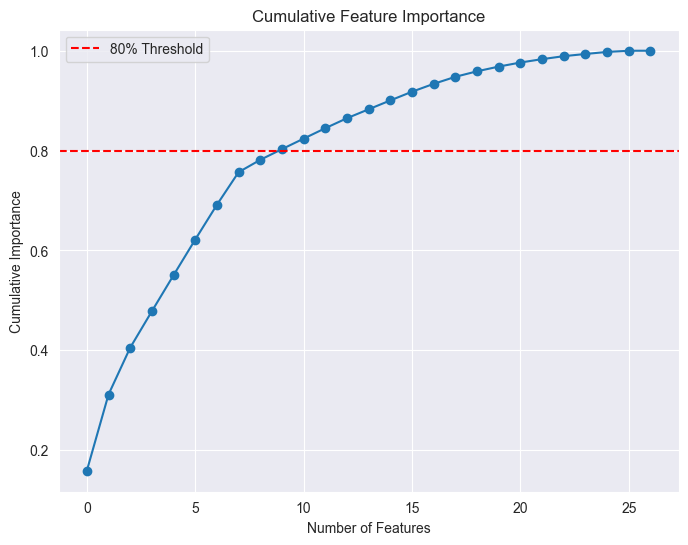


Cumulative importance plot saved as 'cumulative_importance.png'


In [60]:
plt.figure(figsize=(8, 6))
cum_importance = feature_importance_df['Importance'].cumsum()
plt.plot(range(len(cum_importance)), cum_importance, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Threshold')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.legend()
plt.savefig('../plots/cumulative_importance.png')
plt.show()
plt.close()
print("\nCumulative importance plot saved as 'cumulative_importance.png'")

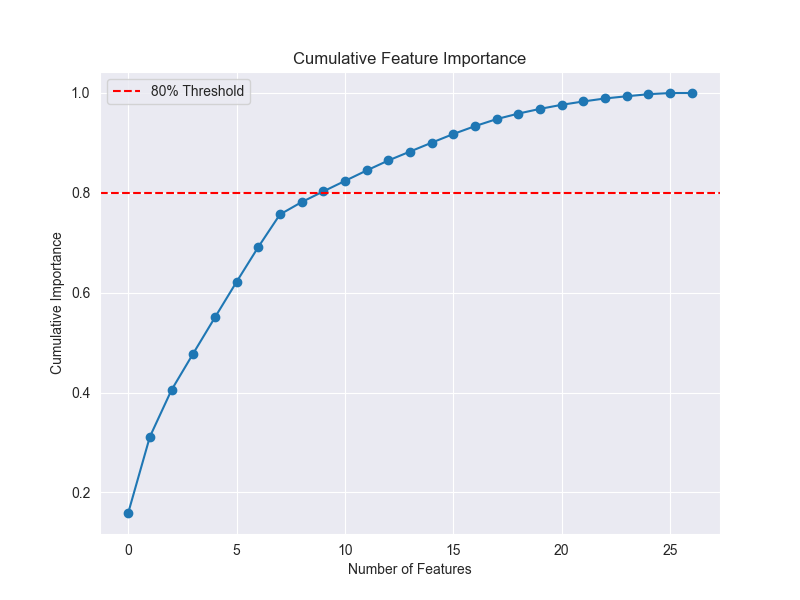

In [61]:
# To load from directory

from IPython.display import Image

Image("../plots/cumulative_importance.png")

In [62]:
loaded_rf = joblib.load('../models/random_forest_model6.joblib')
print(loaded_rf.score(X_test, y_test))

0.8015625


In [63]:
# Print model parameters
print("Number of trees:", loaded_rf.n_estimators)
print("Max depth:", loaded_rf.max_depth)
print("Class weights:", loaded_rf.class_weight)
print("Feature importances:", loaded_rf.feature_importances_)

# Check the feature names used during training (if available)
if hasattr(loaded_rf, 'feature_names_in_'):
    print("Feature names:", loaded_rf.feature_names_in_)
else:
    print("Feature names not stored in model. Use feature_columns from training.")

if hasattr(loaded_rf, 'feature_names_in_'):
    feature_names = loaded_rf.feature_names_in_
else:
    feature_names = []  # replace this with a list of feature names    
feature_importances = loaded_rf.feature_importances_

# Create DataFrame
df = pd.DataFrame({'feature_name': feature_names, 'importance': feature_importances})

# Sort by importance
df = df.sort_values(by='importance', ascending=False)

print(df)


Number of trees: 200
Max depth: 20
Class weights: balanced
Feature importances: [1.52630147e-01 1.58782368e-01 7.13661764e-02 1.77728166e-02
 6.96407741e-02 7.21385003e-02 7.30307134e-02 6.53292038e-02
 9.37978791e-02 6.67837651e-05 2.00096597e-02 2.09150774e-02
 2.14547808e-02 2.47257163e-02 8.14973820e-03 6.73248014e-03
 9.43396108e-03 2.36404281e-03 1.74247453e-02 1.78654322e-02
 4.39348507e-03 4.09079888e-03 2.10138313e-02 1.10219113e-02
 1.57672705e-02 1.40995816e-02 5.98212499e-03]
Feature names: ['Age' 'TAC' 'WHtR_calculated' 'OSA_Probability' 'LogCRP (mg/dL)'
 'Lactate dehydrogenase LDH (U/L)' 'Triglycerides (mg/dL)'
 'Uric acid (mg/dL)' 'Creatinine (mg/dL)' 'Age_Group_40-49'
 'Age_Group_50-59' 'Age_Group_60-69' 'Age_Group_70-79' 'Age_Group_80-89'
 'BMI_cat_Normal' 'BMI_cat_Obese' 'BMI_cat_Overweight'
 'BMI_cat_Underweight' 'Race_Black' 'Race_Mexican American' 'Race_Other'
 'Race_Other Hispanic' 'Race_White' 'HTN_Category_Measured_0.0'
 'HTN_Category_Measured_1.0' 'HTN_Category

In [64]:
# loaded_rf.feature_names_in_ is a list of feature names

if hasattr(loaded_rf, 'feature_names_in_'):
    feature_names = loaded_rf.feature_names_in_
else:
    feature_names = []  # replace this with a list of   feature names

feature_importances = loaded_rf.feature_importances_

# Create DataFrame
df = pd.DataFrame({'feature_name': feature_names, 'importance': feature_importances})

# Sort by importance
df = df.sort_values(by='importance', ascending=False)

print(df)


                       feature_name  importance
1                               TAC    0.158782
0                               Age    0.152630
8                Creatinine (mg/dL)    0.093798
6             Triglycerides (mg/dL)    0.073031
5   Lactate dehydrogenase LDH (U/L)    0.072139
2                   WHtR_calculated    0.071366
4                    LogCRP (mg/dL)    0.069641
7                 Uric acid (mg/dL)    0.065329
13                  Age_Group_80-89    0.024726
12                  Age_Group_70-79    0.021455
22                       Race_White    0.021014
11                  Age_Group_60-69    0.020915
10                  Age_Group_50-59    0.020010
19            Race_Mexican American    0.017865
3                   OSA_Probability    0.017773
18                       Race_Black    0.017425
24        HTN_Category_Measured_1.0    0.015767
25        HTN_Category_Measured_2.0    0.014100
23        HTN_Category_Measured_0.0    0.011022
16               BMI_cat_Overweight    0

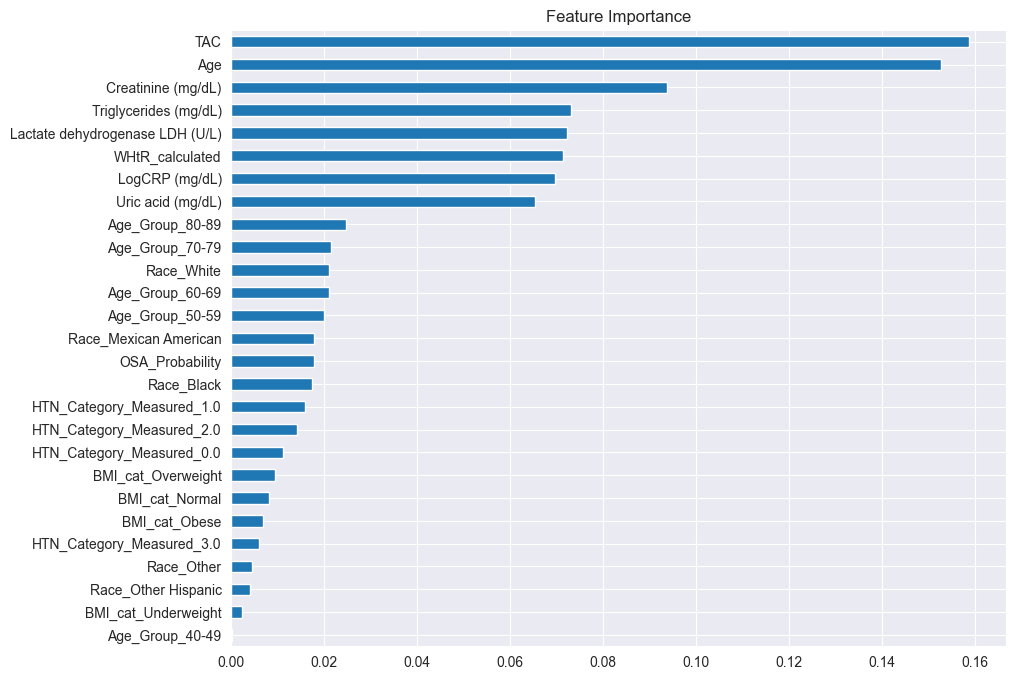

In [65]:

import joblib
import matplotlib.pyplot as plt

# Load the model from the file
rf_from_joblib = joblib.load('../models/random_forest_model6.joblib')

# Now you can use this object as the original RandomForest model.
# Check feature importance
importances = rf_from_joblib.feature_importances_

# Convert feature importances to a Series indexed by column names, and plot it
importance_series = pd.Series(importances, index=X.columns)
top_n = importance_series.sort_values(ascending=True)[:50]

top_n.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance')
plt.show()


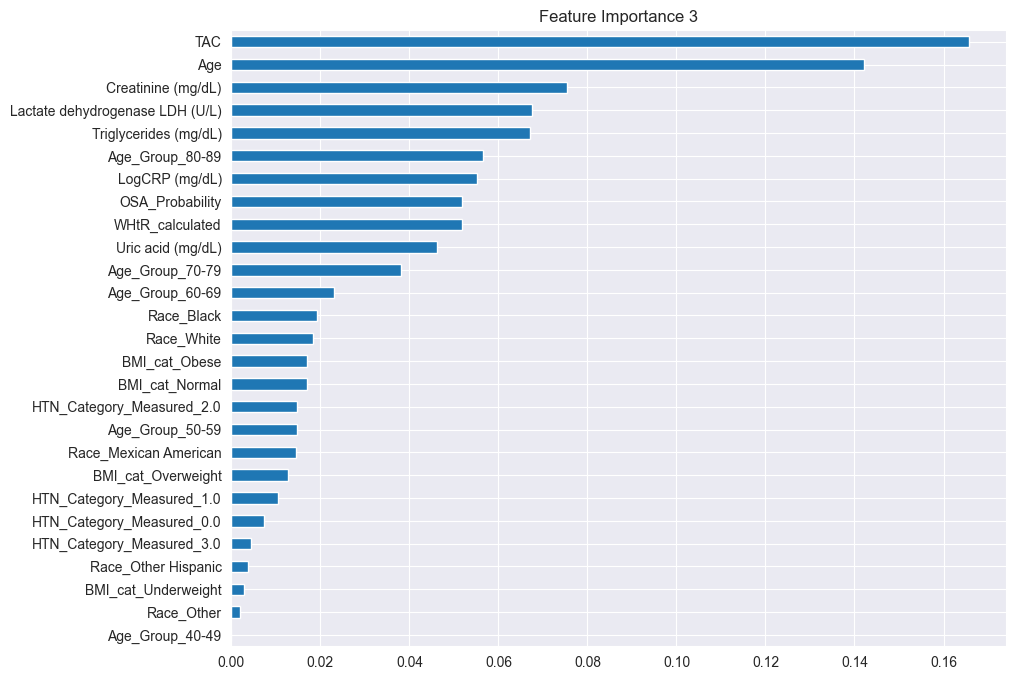

In [66]:
import joblib
import matplotlib.pyplot as plt

# Load the model from the file
rf_from_joblib = joblib.load('random_forest_model5.joblib')

# Now you can use this object as the original RandomForest model.
# Check feature importance
importances = rf_from_joblib.feature_importances_

# Convert feature importances to a Series indexed by column names, and plot it
importance_series = pd.Series(importances, index=X.columns)
top_n = importance_series.sort_values(ascending=True)[:50]

top_n.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance 3')
plt.show()

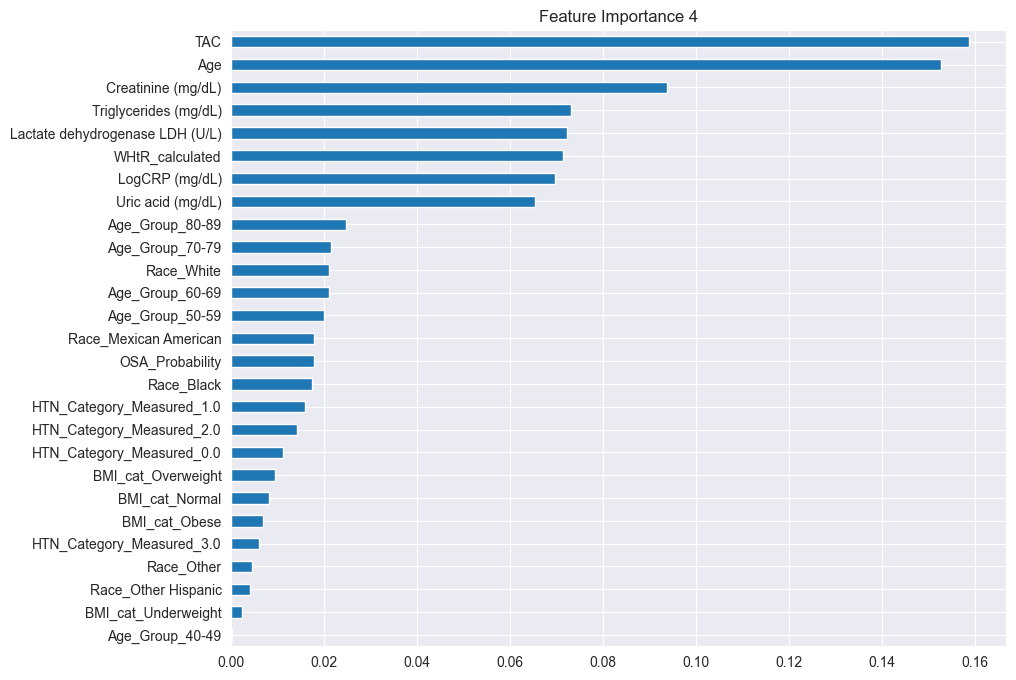

In [67]:
import joblib
import matplotlib.pyplot as plt

# Load the model from the file
rf_from_joblib = joblib.load('random_forest_model4.joblib')

# Now you can use this object as the original RandomForest model.
# Check feature importance
importances = rf_from_joblib.feature_importances_

# Convert feature importances to a Series indexed by column names, and plot it
importance_series = pd.Series(importances, index=X.columns)
top_n = importance_series.sort_values(ascending=True)[:50]

top_n.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance 4')
plt.show()

### Report Draft

 feature_name  importance
1                               TAC    0.158782
0                               Age    0.152630
8                Creatinine (mg/dL)    0.093798
6             Triglycerides (mg/dL)    0.073031
5   Lactate dehydrogenase LDH (U/L)    0.072139
2                   WHtR_calculated    0.071366
4                    LogCRP (mg/dL)    0.069641
7                 Uric acid (mg/dL)    0.065329
13                  Age_Group_80-89    0.024726
12                  Age_Group_70-79    0.021455
22                       Race_White    0.021014
11                  Age_Group_60-69    0.020915
10                  Age_Group_50-59    0.020010
19            Race_Mexican American    0.017865
3                   OSA_Probability    0.017773
18                       Race_Black    0.017425
24        HTN_Category_Measured_1.0    0.015767
25        HTN_Category_Measured_2.0    0.014100
23        HTN_Category_Measured_0.0    0.011022
16               BMI_cat_Overweight    0.009434
14                   BMI_cat_Normal    0.008150
15                    BMI_cat_Obese    0.006732
26        HTN_Category_Measured_3.0    0.005982
20                       Race_Other    0.004393
21              Race_Other Hispanic    0.004091
17              BMI_cat_Underweight    0.002364
9                   Age_Group_40-49    0.000067


Introduction
Objective: Predict mortality using 13 features linked to breathing and metabolism.


Dataset: nhanes_mort_act_morph_lab_df, 3,198 rows, 13 columns.


Methodology


Data Pre-processing: Imputed with median, scaled numerics, encoded categoricals.


Model: RandomForestClassifier with SMOTE, tuned parameters (200 trees, max depth 20, max features 'sqrt', balanced weighting).
Evaluation: 80/20 train-test split, 5-fold CV, F1-scoring.




Results


Performance: Accuracy 0.80, class 0 F1 0.88, class 1 F1 0.38.


Feature Importance: Top features include TAC (0.158), Age (0.152), Creatinine (0.093), LDH (0.072), Triglycerides (0.073), LogCRP (0.069), WHtR (0.071).


Breathing/Metabolism: TAC, WHtR, OSA_Probability and other features indicate breathing insufficiency; Creatinine, LDH, Triglycerides, LogCRP, Uric acid reflect metabolic stress.


CV: Mean F1-Score 0.20 (+/- 0.06), suggesting underfitting.




Discussion


Findings: Insufficient breathing (obesity, low activity) and metabolic stress (hypoxia, inflammation) drive mortality, amplified by age. 


The 0.39 recall for class 1 (up from 0.14) shows SMOTE and balanced weighting’s impact, identifying more deceased cases (39 vs. 14 TP). 

However, precision dropped to 0.38 (from 0.39), indicating a need for finer tuning. The 0.20 mean F1-score with reduced variability suggests underfitting.


Limitations: Low class 1 F1-score indicates suboptimal minority class prediction; feature reduction may have lost signal.


Future Work: Optimize tuning (e.g., min_samples_split), test additional features (e.g., TLAC), validate clinically.


Conclusion


The model identifies breathing and metabolism proxies, with SMOTE and balanced weighting enhancing deceased prediction. Further tuning is needed for precision and F1-score.